TG-AI

# **진단검사 결과 검체뒤바뀜 오류 감지**

세부 목표

1. Clinical Tabular DB 다루기

2. 진단검사 내 오류 감지 모델 개발

3. 하이퍼파라미터 튜닝

# **1. Introductions**

## 진단검사란

- 정의 : 인체에서 유래하는 각종 검체(혈액, 소변, 체액, 등)에 대한 적절한 검사로 질병 진단이나 치료효과 판정에 도움을 주는 검사

- 그림. 검사 순서

    ![image.png?raw=true](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/image1.png?raw=true)
    
- 진단검사 오류 ?

    ![image.png?raw=true](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/image3.png?raw=true)

- 문제점 (기존 방법 포함)

    ![image.png?raw=true](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/image2.png?raw=true)

- 그 중 샘플 뒤바뀜 오류 

    ![image-3.png?raw=true](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/image-3.png?raw=true)



- 문제 해결 방안




## 튜토리얼 목차

튜토리얼은 **제시된 상황에서 문제 해결하는 방식**으로 진행됩니다.

## 문제 상황

### 배경
서울의 한 번창하던 병원에서 갑자기 수많은 환자들이 이틀에 걸쳐 몰렸습니다. 이 과정에서 **혈액 검체가 뒤바뀌는 사고**가 발생하며, 잘못된 진단과 치료로 인해 몇몇 환자는 심각한 부작용을 겪거나 생명을 잃는 비극적인 일이 벌어졌습니다. 

이 사고로 인해 병원의 신뢰도는 급격히 하락했고, 환자들은 다른 병원을 찾기 시작했습니다. 병원장은 이러한 상황을 지켜보며 극심한 스트레스와 우울증에 시달렸고, 기존 시스템으로는 문제를 해결할 수 없다는 것을 깨달았습니다. 병원은 문을 닫을 위기에 처하게 되었고, 병원장은 절망 끝에 생을 마감하려는 결심을 했습니다.

그러나, 그 순간 **신비로운 힘**에 의해 과거로 돌아갈 수 있는 기회를 얻게 되었습니다. 과거로 돌아온 병원장은 **AI(인공지능)**를 활용해 검체 뒤바뀜 문제를 근본적으로 해결하고 병원 시스템을 혁신하기로 결심했습니다.

---

### 목표
11종의 검사항목으로 구성된 검체들의 검사 결과에서 **뒤바뀐 검체를 식별하는 AI 모델을 개발**하는 것입니다.

#### 검사항목
- **Albumin**
- **ALP**
- **ALT**
- **AST**
- **BUN**
- **Creatinine**
- **GGT**
- **Glucose**
- **LDH**
- **Total Bilirubin**
- **Total Protein**

#### 상황
- 기간: **2024년 10월 29일 ~ 2024년 10월 31일**
- 문제: **검체 및 검사가 폭주**하며 원인 미상으로 검체 뒤바뀜 사고 발생.
- 목표: 뒤바뀐 검체를 정확히 찾아내는 **인공지능 모델 개발**.

---

## 데이터베이스

| 파일 이름            | 설명                                       |
|----------------------|--------------------------------------------|
| **development_set.csv** | 검증된 오류가 없는 데이터 (`error-free`).    |
| **test_set.csv**      | 검체 뒤바뀜 사고가 있는 데이터.             |
| **test_label.csv**    | 검체-정답으로 구성된 데이터 (`ground truth`).     |

---

## **평가 방법**

### 기존 문제점
- 기존 방법은 검체 뒤바뀜 오류를 충분히 탐지하지 못함.
- 탐지한 오류조차 많은 오판을 포함함.

### 해결 목표
- **F1-score**가 가장 높은 인공지능 모델을 개발하여 오류 탐지 능력을 개선.

#### F1-score 정의
F1-score는 **Precision**과 **Recall**을 결합하여 계산됩니다:

\[\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}\]

- **Precision:** 탐지된 오류 중 실제 오류인 비율.
- **Recall:** 실제 오류 중 탐지된 오류의 비율.

F1-score를 통해 오류를 **더 많이, 더 정확히 탐지**할 수 있는지를 평가합니다.

## **평가 방법 및 데이터 형식 예시**

### 테스트 방법
- 최종 예측정보는 "evaludation_set.csv"를 통해 평가한 결과를 evaluation_predictions(y_predictions)를 사용하여 성능확인 바람.


# **2. Data**
------
## **2.1. load data**

In [6]:
import pandas as pd

# Development set
df_D_set = pd.read_csv('development_set.csv')

# # test set
# df_T_set=pd.read_csv('test_set.csv')

print('### Devlopment set')
display(df_D_set)

### Devlopment set


,검체번호,검사일,환자번호,성별,나이,검사항목,결과,진료과,입원/외래
0,H8XGOUY1S,2024-10-10 14:54:53,Z6GX99U,F,83,GGT,19,3ZU,입원
1,H8XGOUY1S,2024-10-10 14:54:53,Z6GX99U,F,83,Glucose,94,3ZU,입원
2,H8XGOUY1S,2024-10-10 14:54:53,Z6GX99U,F,83,Creatinine,3,3ZU,입원
3,H8XGOUY1S,2024-10-10 14:54:53,Z6GX99U,F,83,AST,16,3ZU,입원
4,H8XGOUY1S,2024-10-10 14:54:53,Z6GX99U,F,83,Albumin,2.8,3ZU,입원
...,...,...,...,...,...,...,...,...,...
241694,A4D38G81C,2024-10-25 00:10:55,0IIYEXL,F,50,LDH,245,D9S,외래
241695,A4D38G81C,2024-10-25 00:10:55,0IIYEXL,F,50,Total Bilirubin,0.18,D9S,외래
241696,A4D38G81C,2024-10-25 00:10:55,0IIYEXL,F,50,AST,21,D9S,외래
241697,A4D38G81C,2024-10-25 00:10:55,0IIYEXL,F,50,ALT,15,D9S,외래


- 데이터세트의 구조 및 이해를 위한 여러가지 방법이 있음 (요약통계, 분포 시각화, 상관관계 분석 등)

- 데이터세트 구조 파악을 통해 데이터 전처리 및 분석에 대한 효과적인 계획을 수립 가능

- 데이터세트 구조적인 이해는 데이터 결측치, 이상치 처리, 적절한 변수 변환, 인코딩 등을 결정하는데 매우 필수적이며 핵심

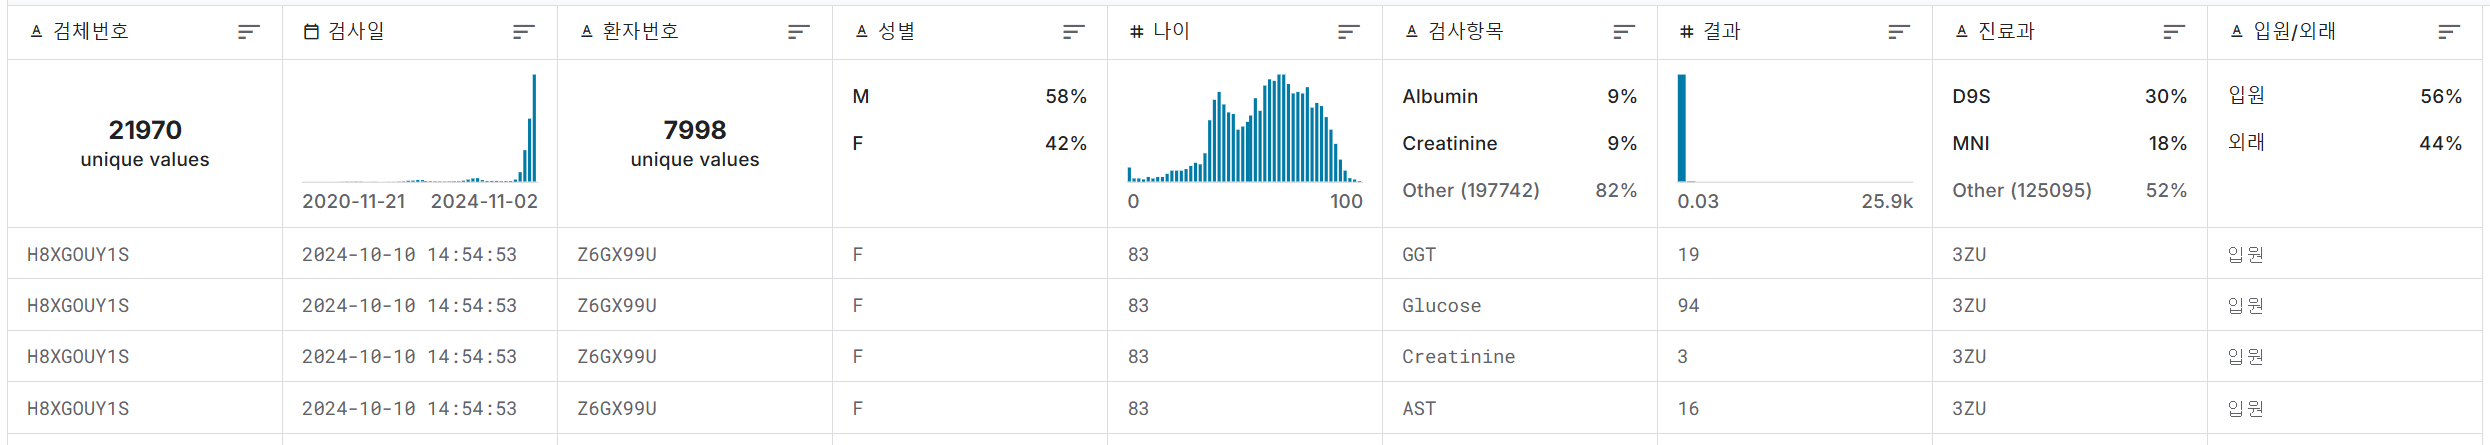


## Pandas Profiling Report

In [7]:
#!pip install pandas profiling
import pandas_profiling

profile=df_D_set.profile_report()
# profile.to_file('profile_report.html')

C:\Users\SHS_MAIN\AppData\Local\Temp\ipykernel_62628\3587513816.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


## 데이터 확인 결과

- 환자는 다양한 검사를 수행하고, 여러번 검사를 할 수도 있음 = 한환자에서도 여러 검체가 추출될 수 있음

- 이러한 하나의 검체로 부터 여러 검사결과가 나옴


# **3. Input Data Generation**
---

## **3.1. 입력데이터 구성을 위한 피벗팅**

**Delta Check** [ref]

- 직전 검사결과에 비해 현재 검사결과가 얼마나 바뀌었는지 확인하는 방법

- 이 방법과 유사하게 진행하고자함

- 이를 위해 같은환자의 직전검사결과를 가져오고자함

- 이후, 이전결과, 현재결과로 구성된 데이터세트로 변형

In [8]:
# 1. 데이터 피벗팅 (pivot_table)
df_pivot = df_D_set.pivot_table(
    index=['검체번호', '검사일', '환자번호', '성별', '나이', '진료과', '입원/외래'],  # 고정할 인덱스 열
    columns='검사항목',  # 피벗팅할 열
    values='결과',  # 피벗된 열의 값으로 사용할 데이터
    aggfunc='first'  # 중복된 값이 있을 경우 첫 번째 값 사용
).reset_index()  # 결과를 데이터프레임으로 반환

print('### 피벗팅 결과')
display(df_pivot)  # 피벗 결과 확인

# 2. '환자번호'와 '검사일' 기준으로 데이터 정렬
df_pivot.sort_values(['환자번호', '검사일'], inplace=True)

# 3. '환자번호' 기준으로 그룹화
grouped = df_pivot.groupby('환자번호')

# 4. 그룹 내에서 이전 행 데이터를 가져옴
previous_results = grouped.shift(1)  # 각 그룹의 이전 행을 가져옴
previous_results.columns = ['prev_' + str(col) for col in previous_results.columns]  # 열 이름에 'prev_' 접두사 추가

# 5. 현재 결과(df_pivot)와 이전 결과(previous_results)를 합침
final_df = pd.concat([df_pivot, previous_results], axis=1).reset_index(drop=True)  # 두 데이터프레임을 열 방향으로 합침

print('### 현재결과 및 직전결과로 구성을 변형한 결과')
display(final_df)  # 최종 데이터프레임 확인

# 6. 결측치 제거 (이전 결과가 없는 첫 행 등)
df_input = final_df.dropna()  # NaN이 포함된 행 제거

print('### 의미없는 직전결과는 제외한 결과')
display(df_input)  # 최종 데이터프레임 확인

# 7. 최종 데이터프레임의 열 이름 출력
print(df_input.columns)

### 피벗팅 결과


검사항목,검체번호,검사일,환자번호,성별,나이,진료과,입원/외래,ALP,ALT,AST,Albumin,BUN,Creatinine,GGT,Glucose,LDH,Total Bilirubin,Total Protein
0,001DTNY7L,2021-09-08 09:13:07,9HEUF99,M,40,D9S,외래,68,13,21,4.7,6.5,0.9,21,97,268,0.72,7.4
1,001JX9J2L,2024-01-04 23:12:05,ZYJFPVK,F,37,MNI,외래,67,18,31,4.5,9.3,0.6,10,88,155,0.52,6.8
2,003M08XZH,2024-10-05 18:50:59,89DER5N,M,61,3ZU,입원,81,17,15,3.1,6.9,0.4,55,93,274,1.03,6.7
3,004PN9OS8,2024-11-01 23:44:44,11JX8YC,F,47,MS0,입원,54,20,22,4.1,15.3,0.4,19,95,326,0.31,7
4,009CL402Z,2024-11-01 00:21:06,ZK33CA6,F,89,D9S,외래,102,130,294,4.3,43.9,1.7,107,226,482,1.52,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21965,ZZNM0D4KF,2022-09-12 22:28:00,AHR4G1K,M,56,K5S,외래,60,22,17,5,12.9,1,28,121,157,0.8,7.4
21966,ZZOX5O5H3,2024-10-08 14:50:02,SU70K7G,F,29,D9S,입원,132,2317,1842,4.9,8.3,0.6,1013,129,2725,8.82,8.4
21967,ZZW5ACAVI,2024-09-07 23:36:39,IC4J9KZ,F,59,D9S,외래,353,758,1234,4.6,7.3,0.5,825,115,998,2.32,6.7
21968,ZZWPT2EU4,2024-10-17 07:41:00,41OC0JM,M,2,Y92,입원,180,26,65,4.5,11.6,0.3,12,99,771,0.44,7.1


### 현재결과 및 직전결과로 구성을 변형한 결과


,검체번호,검사일,환자번호,성별,나이,진료과,입원/외래,ALP,ALT,AST,...,prev_ALT,prev_AST,prev_Albumin,prev_BUN,prev_Creatinine,prev_GGT,prev_Glucose,prev_LDH,prev_Total Bilirubin,prev_Total Protein
0,0LMV73ZUX,2024-08-12 00:59:46,000T8NY,M,66,D9S,외래,76,17,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EVE6NNR3L,2024-09-13 23:21:23,000T8NY,M,66,D9S,외래,118,191,236,...,17,21,3.1,20.4,1.2,23,113,260,0.95,6.3
2,G2MCGEFYW,2024-08-02 06:35:09,006A2VZ,F,19,D9S,입원,66,13,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,506HFY625,2024-09-10 23:37:06,006A2VZ,F,19,D9S,입원,60,13,20,...,13,20,4.7,13.2,0.6,17,101,309,0.34,7.2
4,JGE6BYYQH,2024-09-21 15:51:58,00D2LN5,F,1,D9S,입원,324,25,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21965,G94WFQNCF,2024-10-14 23:54:34,ZZ006ZJ,M,78,K5S,외래,101,35,27,...,41,29,4.5,20.7,1.1,48,141,151,0.45,7
21966,95IWGRJ2Q,2024-07-17 17:33:34,ZZMZWI3,M,35,D9S,외래,63,11,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21967,YTVT6RVNM,2024-09-10 00:32:01,ZZMZWI3,M,35,D9S,외래,59,16,22,...,11,18,4.8,8.5,0.9,35,119,176,0.38,6.9
21968,1V4P1YYDN,2024-10-14 20:42:50,ZZPBY7T,M,68,K5S,입원,53,21,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 의미없는 직전결과는 제외한 결과


,검체번호,검사일,환자번호,성별,나이,진료과,입원/외래,ALP,ALT,AST,...,prev_ALT,prev_AST,prev_Albumin,prev_BUN,prev_Creatinine,prev_GGT,prev_Glucose,prev_LDH,prev_Total Bilirubin,prev_Total Protein
1,EVE6NNR3L,2024-09-13 23:21:23,000T8NY,M,66,D9S,외래,118,191,236,...,17,21,3.1,20.4,1.2,23,113,260,0.95,6.3
3,506HFY625,2024-09-10 23:37:06,006A2VZ,F,19,D9S,입원,60,13,20,...,13,20,4.7,13.2,0.6,17,101,309,0.34,7.2
5,FJNPE148M,2024-10-28 23:10:04,00D2LN5,F,1,Y92,입원,283,28,32,...,25,37,4.5,23,0.3,7,91,725,0.19,6.3
7,GSLO14AW0,2024-09-25 23:58:50,00GAI20,M,47,YQV,입원,173,437,212,...,393,823,4.1,17.1,0.7,923,142,1367,1.6,6.8
8,DLJ2OU5HJ,2024-10-09 23:25:50,00GAI20,M,47,YQV,입원,95,25,22,...,437,212,4.1,9.6,0.7,842,112,626,1.35,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21962,XVBH25YNQ,2024-10-25 00:02:23,ZYWX4N9,M,41,MNI,외래,71,31,30,...,32,31,5.5,17.3,0.8,54,75,258,1.62,9.2
21964,D8PWEANPI,2023-10-10 22:57:49,ZZ006ZJ,M,77,K5S,외래,82,41,29,...,28,35,4,30.8,1.5,36,148,352,1.34,7.1
21965,G94WFQNCF,2024-10-14 23:54:34,ZZ006ZJ,M,78,K5S,외래,101,35,27,...,41,29,4.5,20.7,1.1,48,141,151,0.45,7
21967,YTVT6RVNM,2024-09-10 00:32:01,ZZMZWI3,M,35,D9S,외래,59,16,22,...,11,18,4.8,8.5,0.9,35,119,176,0.38,6.9


Index(['검체번호', '검사일', '환자번호', '성별', '나이', '진료과', '입원/외래', 'ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein', 'prev_검체번호', 'prev_검사일', 'prev_성별',
       'prev_나이', 'prev_진료과', 'prev_입원/외래', 'prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein'],
      dtype='object')


## **3.2. 데이터 인코딩**

인코딩이란?



In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
tdf_input = df_input.copy()
tdf_input.columns
tdf_input=tdf_input.convert_dtypes()
tdf_input.dtypes
tdf_input

,검체번호,검사일,환자번호,성별,나이,진료과,입원/외래,ALP,ALT,AST,...,prev_ALT,prev_AST,prev_Albumin,prev_BUN,prev_Creatinine,prev_GGT,prev_Glucose,prev_LDH,prev_Total Bilirubin,prev_Total Protein
1,EVE6NNR3L,2024-09-13 23:21:23,000T8NY,M,66,D9S,외래,118,191,236,...,17,21,3.1,20.4,1.2,23,113,260,0.95,6.3
3,506HFY625,2024-09-10 23:37:06,006A2VZ,F,19,D9S,입원,60,13,20,...,13,20,4.7,13.2,0.6,17,101,309,0.34,7.2
5,FJNPE148M,2024-10-28 23:10:04,00D2LN5,F,1,Y92,입원,283,28,32,...,25,37,4.5,23,0.3,7,91,725,0.19,6.3
7,GSLO14AW0,2024-09-25 23:58:50,00GAI20,M,47,YQV,입원,173,437,212,...,393,823,4.1,17.1,0.7,923,142,1367,1.6,6.8
8,DLJ2OU5HJ,2024-10-09 23:25:50,00GAI20,M,47,YQV,입원,95,25,22,...,437,212,4.1,9.6,0.7,842,112,626,1.35,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21962,XVBH25YNQ,2024-10-25 00:02:23,ZYWX4N9,M,41,MNI,외래,71,31,30,...,32,31,5.5,17.3,0.8,54,75,258,1.62,9.2
21964,D8PWEANPI,2023-10-10 22:57:49,ZZ006ZJ,M,77,K5S,외래,82,41,29,...,28,35,4,30.8,1.5,36,148,352,1.34,7.1
21965,G94WFQNCF,2024-10-14 23:54:34,ZZ006ZJ,M,78,K5S,외래,101,35,27,...,41,29,4.5,20.7,1.1,48,141,151,0.45,7
21967,YTVT6RVNM,2024-09-10 00:32:01,ZZMZWI3,M,35,D9S,외래,59,16,22,...,11,18,4.8,8.5,0.9,35,119,176,0.38,6.9


In [11]:
# 데이터 사전 확인
print('### 성별\n',tdf_input['성별'].value_counts(),'\n\n')
print('### 환자종류\n',tdf_input['입원/외래'].value_counts())

### 성별
 M    8217
F    5755
Name: 성별, dtype: Int64 


### 환자종류
 입원    8060
외래    5912
Name: 입원/외래, dtype: Int64


In [12]:
# 성별 및 입원/외래 에 해당하는 변수 변환
tdf_input.loc[:,'성별']=tdf_input['성별'].astype(str).map({'M':1,'F':2})
tdf_input.loc[:,'prev_성별']=tdf_input['prev_성별'].astype(str).map({'M':1,'F':2})
tdf_input.loc[:,'입원/외래']=tdf_input['입원/외래'].astype(str).map({'입원':1,'외래':2})
tdf_input.loc[:,'prev_입원/외래']=tdf_input['prev_입원/외래'].astype(str).map({'입원':1,'외래':2})

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # LabelEncoder 인스턴스를 생성합니다
tdf_input.loc[:,'진료과'] = tdf_input['진료과'].astype(str)
tdf_input.loc[:,'prev_진료과'] = tdf_input['prev_진료과'].astype(str)

# '진료과' 및 'prev_진료과' 열의 모든 고유 값들을 하나의 시리즈로 결합하고, NaN 값을 제거한 후 고유한 값들만 추출합니다
all_departments = pd.concat([tdf_input['진료과'], tdf_input['prev_진료과']]).dropna().unique() 
# LabelEncoder를 사용하여 모든 진료과의 데이터에 대해 숫자형 레이블로 변환을 학습 (fit)
encoder.fit(all_departments)
tdf_input.loc[:,'진료과'] = encoder.transform(tdf_input['진료과']) # 학습된 결과를 그대로 적용 transform
tdf_input.loc[:,'prev_진료과'] = encoder.transform(tdf_input['prev_진료과'])

In [14]:
import re
def extract_number(value):
    # 정규 표현식을 사용하여 문자열에서 숫자만 추출
    match = re.search(r'\d+(\.\d+)?', str(value))
    if match:
        return float(match.group())
    return None

sel_col = ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein','prev_ALP',
       'prev_ALT', 'prev_AST', 'prev_Albumin', 'prev_BUN', 'prev_Creatinine',
       'prev_GGT', 'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']

for col in sel_col:
    tdf_input[col] = tdf_input[col].apply(extract_number)
tdf_input.dtypes


검체번호                     string
검사일                      string
환자번호                     string
성별                        int64
나이                        Int64
진료과                       int32
입원/외래                     int64
ALP                     float64
ALT                     float64
AST                     float64
Albumin                 float64
BUN                     float64
Creatinine              float64
GGT                     float64
Glucose                 float64
LDH                     float64
Total Bilirubin         float64
Total Protein           float64
prev_검체번호                string
prev_검사일                 string
prev_성별                   int64
prev_나이                   Int64
prev_진료과                  int32
prev_입원/외래                int64
prev_ALP                float64
prev_ALT                float64
prev_AST                float64
prev_Albumin            float64
prev_BUN                float64
prev_Creatinine         float64
prev_GGT                float64
prev_Glu

In [15]:
x=tdf_input[['검체번호','환자번호','검사일','성별','나이','진료과','입원/외래','ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein','prev_나이', 'prev_진료과', 'prev_입원/외래', 'prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']]
x = x.reset_index(drop=True)
# 실제 사용할 변수들 한정해서 input dataset 구성

# **4. Model Development**
---

### 검체뒤바뀜 오류 시뮬레이션

In [91]:
import numpy as np

def shuffle_selected_columns_together_df(df, columns, shuffle_ratio, random_state=None):
    """
    Shuffles entire rows of the selected columns in the input DataFrame based on the specified shuffle ratio.
    
    Args:
    df (pandas.DataFrame): The input data DataFrame to be shuffled.
    columns (list of str or int): List of column names or indices to shuffle together.
    shuffle_ratio (float): The fraction of the rows to shuffle (0 < shuffle_ratio <= 1).
    random_state (int, optional): A seed number to make the shuffle deterministic. Default is None.
    
    Returns:
    pandas.DataFrame: The shuffled DataFrame.
    numpy.array: An indicator array where shuffled rows are marked as 1 and others as 0.
    """

    arr = df.copy()
    rng = np.random.RandomState(random_state)
    num_rows_to_shuffle = int(arr.shape[0] * shuffle_ratio)
    shuffle_indices = rng.permutation(arr.shape[0])[:num_rows_to_shuffle]
    
    selected_data = arr.loc[shuffle_indices, columns]
    selected_data = selected_data.sample(frac=1, random_state=random_state)
    arr.loc[shuffle_indices, columns] = selected_data.values
    
    shuffle_indicator = np.zeros(arr.shape[0], dtype=int)
    shuffle_indicator[shuffle_indices] = 1
    
    return arr, shuffle_indicator


## **4.1. Data Spliting**

### 조건을 고려하지 않은 일반적인 방법

In [18]:
from sklearn.model_selection import train_test_split

# insilico simulation
x_total,y_total=shuffle_selected_columns_together_df(x, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.01, random_state=111)

x_train, x_val, y_train, y_val = train_test_split(x_total,y_total, test_size=0.2, random_state=42)

print('train set : ',x_train.shape, ',  label (0/1): ',sum(y_train==0),'/',sum(y_train==1))
print('val set : ', x_val.shape, ',  label (0/1): ',sum(y_val==0),'/',sum(y_val==1))


train set :  (11177, 32) ,  label (0/1):  11064 / 113
val set :  (2795, 32) ,  label (0/1):  2769 / 26


## **4.1. XGBoost** 

In [19]:
import xgboost as xgb

# XGB setting
model = xgb.XGBClassifier(    
    objective='binary:logistic',  # 이진 분류
    max_depth=5,  # 최대 트리 깊이
    learning_rate=0.001,  # 학습률
    n_estimators=100,  # 부스팅 단계 수
    eval_metric='error'  # 평가 메트릭
)

In [ ]:
# XGB traning
sel_str = ['성별','나이','진료과','입원/외래','ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein','prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']
model.fit(x_train[sel_str], y_train,early_stopping_rounds=100,eval_set=[(x_val[sel_str], y_val)])

# XGB testing
y_pred  = model.predict(x_val[sel_str])
y_pred_probs = model.predict_proba(x_val[sel_str])[:,1]

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score
# 정확도 계산
accuracy = accuracy_score(y_val, y_pred)

# 민감도(Recall) 계산
sensitivity = recall_score(y_val, y_pred)

# 특이도 계산
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
specificity = tn / (tn + fp)

# F1-score 계산
f1 = f1_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balaced Accuracy: {(sensitivity+specificity)/2:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")

[0]	validation_0-error:0.00930
[1]	validation_0-error:0.00930
[2]	validation_0-error:0.00930
[3]	validation_0-error:0.00930
[4]	validation_0-error:0.00930
[5]	validation_0-error:0.00930
[6]	validation_0-error:0.00930
[7]	validation_0-error:0.00930
[8]	validation_0-error:0.00930
[9]	validation_0-error:0.00930
[10]	validation_0-error:0.00930
[11]	validation_0-error:0.00930
[12]	validation_0-error:0.00930
[13]	validation_0-error:0.00930
[14]	validation_0-error:0.00930
[15]	validation_0-error:0.00930
[16]	validation_0-error:0.00930
[17]	validation_0-error:0.00930
[18]	validation_0-error:0.00930
[19]	validation_0-error:0.00930
[20]	validation_0-error:0.00930
[21]	validation_0-error:0.00930
[22]	validation_0-error:0.00930
[23]	validation_0-error:0.00930
[24]	validation_0-error:0.00930
[25]	validation_0-error:0.00930
[26]	validation_0-error:0.00930
[27]	validation_0-error:0.00930
[28]	validation_0-error:0.00930
[29]	validation_0-error:0.00930
[30]	validation_0-error:0.00930
[31]	validation_0-

In [ ]:
# upgrade model
model = xgb.XGBClassifier(    
    objective='binary:logistic',  # 이진 분류
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum(),
    max_depth=20,  # 최대 트리 깊이
    learning_rate=0.0001,  # 학습률
    n_estimators=1000,  # 부스팅 단계 수
    eval_metric='aucpr',  # 평가 메트릭
    alpha=1e-4,
    )

model.fit(x_train[sel_str], y_train,early_stopping_rounds=100,eval_set=[(x_val[sel_str], y_val)])

# XGB testing
y_pred  = model.predict(x_val[sel_str])
y_pred_probs = model.predict_proba(x_val[sel_str])[:,1]

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score

# 민감도(Recall) 계산
sensitivity = recall_score(y_val, y_pred)

# 특이도 계산
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
specificity = tn / (tn + fp)

# F1-score 계산
f1 = f1_score(y_val, y_pred)

print(f"Balaced Accuracy: {(sensitivity+specificity)/2:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")


[0]	validation_0-aucpr:0.01806
[1]	validation_0-aucpr:0.01851
[2]	validation_0-aucpr:0.01874
[3]	validation_0-aucpr:0.01872
[4]	validation_0-aucpr:0.01873
[5]	validation_0-aucpr:0.01870
[6]	validation_0-aucpr:0.01884
[7]	validation_0-aucpr:0.01885
[8]	validation_0-aucpr:0.01885
[9]	validation_0-aucpr:0.01884
[10]	validation_0-aucpr:0.01884
[11]	validation_0-aucpr:0.01885
[12]	validation_0-aucpr:0.01885
[13]	validation_0-aucpr:0.01886
[14]	validation_0-aucpr:0.01885
[15]	validation_0-aucpr:0.01885
[16]	validation_0-aucpr:0.01886
[17]	validation_0-aucpr:0.01884
[18]	validation_0-aucpr:0.01884
[19]	validation_0-aucpr:0.01884
[20]	validation_0-aucpr:0.01885
[21]	validation_0-aucpr:0.01885
[22]	validation_0-aucpr:0.01885
[23]	validation_0-aucpr:0.01885
[24]	validation_0-aucpr:0.01885
[25]	validation_0-aucpr:0.01885
[26]	validation_0-aucpr:0.01885
[27]	validation_0-aucpr:0.01885
[28]	validation_0-aucpr:0.01885
[29]	validation_0-aucpr:0.01885
[30]	validation_0-aucpr:0.01885
[31]	validation_0-

In [89]:
from evaluation import evaluate_predictions
x_test = pd.read_csv('evaluation_set.csv')
y_pred = model.predict(x_test[sel_str])
evaluate_predictions(y_pred)

TypeError: evaluate_predictions() missing 1 required positional argument: 'y_pred'

### 환경적 요소를 고려한 데이터 시뮬레이션 및 spliting

In [52]:
x.columns

Index(['검체번호', '환자번호', '검사일', '성별', '나이', '진료과', '입원/외래', 'ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein', 'prev_나이', 'prev_진료과', 'prev_입원/외래',
       'prev_ALP', 'prev_ALT', 'prev_AST', 'prev_Albumin', 'prev_BUN',
       'prev_Creatinine', 'prev_GGT', 'prev_Glucose', 'prev_LDH',
       'prev_Total Bilirubin', 'prev_Total Protein'],
      dtype='object')

In [82]:
# 데이터 환경고려
from sklearn.model_selection import  GroupShuffleSplit, train_test_split

# insilico simulation
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(gss.split(x, groups=x['환자번호']))
x_train = x.iloc[train_idx].reset_index(drop=True)
x_val = x.iloc[test_idx].reset_index(drop=True)

x_train,y_train=shuffle_selected_columns_together_df(x_train, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.4, random_state=111)

x_val,y_val=shuffle_selected_columns_together_df(x_val, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.1, random_state=111)



In [88]:
# upgrade model
model = []
model = xgb.XGBClassifier(    
    objective='binary:logistic',  # 이진 분류
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum(),
    max_depth=100,  # 최대 트리 깊이
    learning_rate=0.01,  # 학습률
    n_estimators=1000,  # 부스팅 단계 수
    eval_metric='aucpr',  # 평가 메트릭
    # alpha=1e-4,
    )

model.fit(x_train[sel_str], y_train,early_stopping_rounds=100
          ,eval_set=[(x_train[sel_str],y_train),(x_val[sel_str], y_val)]
          ,verbose = 2)

# XGB testing
y_pred  = model.predict(x_val[sel_str])
y_pred_probs = model.predict_proba(x_val[sel_str])[:,1]

# 민감도(Recall) 계산
sensitivity = recall_score(y_val, y_pred)
# 특이도 계산
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
specificity = tn / (tn + fp)

# F1-score 계산
f1 = f1_score(y_val, y_pred)

print(f"Balaced Accuracy: {(sensitivity+specificity)/2:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1-Score: {f1:.3f}")

y_pred = model.predict(x_test[sel_str])
evaluate_predictions(y_pred)


[0]	validation_0-aucpr:0.96126	validation_1-aucpr:0.29246
[2]	validation_0-aucpr:0.97314	validation_1-aucpr:0.30571
[4]	validation_0-aucpr:0.97186	validation_1-aucpr:0.31093
[6]	validation_0-aucpr:0.97531	validation_1-aucpr:0.31052
[8]	validation_0-aucpr:0.97839	validation_1-aucpr:0.32304
[10]	validation_0-aucpr:0.98068	validation_1-aucpr:0.34383
[12]	validation_0-aucpr:0.98177	validation_1-aucpr:0.35438
[14]	validation_0-aucpr:0.98275	validation_1-aucpr:0.35962
[16]	validation_0-aucpr:0.98407	validation_1-aucpr:0.36215
[18]	validation_0-aucpr:0.98534	validation_1-aucpr:0.36915
[20]	validation_0-aucpr:0.98627	validation_1-aucpr:0.37425
[22]	validation_0-aucpr:0.98698	validation_1-aucpr:0.38315
[24]	validation_0-aucpr:0.98824	validation_1-aucpr:0.38932
[26]	validation_0-aucpr:0.98967	validation_1-aucpr:0.39647
[28]	validation_0-aucpr:0.99076	validation_1-aucpr:0.40303
[30]	validation_0-aucpr:0.99169	validation_1-aucpr:0.40837
[32]	validation_0-aucpr:0.99256	validation_1-aucpr:0.41068
[3

## **4.2. DNN**

DNN 설명


# **4.3. Preprocessing**

스케일링 적용 부분 + 스케일링 설명


성능 추출

# **5. Hyperparameter + Architecture Tuning**

# 입력데이터 구성을 위한 피벗팅

In [ ]:
# 1. 데이터 피벗팅 (pivot_table)
df_pivot = df_D_set.pivot_table(
    index=['검체번호', '검사일', '환자번호', '성별', '나이', '진료과', '입원/외래'],  # 고정할 인덱스 열
    columns='검사항목',  # 피벗팅할 열
    values='결과',  # 피벗된 열의 값으로 사용할 데이터
    aggfunc='first'  # 중복된 값이 있을 경우 첫 번째 값 사용
).reset_index()  # 결과를 데이터프레임으로 반환
display(df_pivot)  # 피벗 결과 확인

# 2. '환자번호'와 '검사일' 기준으로 데이터 정렬
df_pivot.sort_values(['환자번호', '검사일'], inplace=True)

# 3. '환자번호' 기준으로 그룹화
grouped = df_pivot.groupby('환자번호')

# 4. 그룹 내에서 이전 행 데이터를 가져옴
previous_results = grouped.shift(1)  # 각 그룹의 이전 행을 가져옴
previous_results.columns = ['prev_' + str(col) for col in previous_results.columns]  # 열 이름에 'prev_' 접두사 추가

# 5. 현재 결과(df_pivot)와 이전 결과(previous_results)를 합침
final_df = pd.concat([df_pivot, previous_results], axis=1).reset_index(drop=True)  # 두 데이터프레임을 열 방향으로 합침

# 6. 결측치 제거 (이전 결과가 없는 첫 행 등)
df_input = final_df.dropna()  # NaN이 포함된 행 제거
display(df_input)  # 최종 데이터프레임 확인

# 7. 최종 데이터프레임의 열 이름 출력
print(df_input.columns)

In [ ]:

# ---------------------------------------------------------------------
# df_T_set 피벗팅
final_df = []
df_pivot = df_T_set.pivot_table(
    index=['검체번호', '검사일', '환자번호', '성별', '나이', '진료과', '입원/외래'],  # 고정할 인덱스 열
    columns='검사항목',  # 피벗팅할 열
    values='결과',  # 피벗된 열의 값으로 사용할 데이터
    aggfunc='first'  # 중복된 값이 있을 경우 첫 번째 값 사용
).reset_index()  # 결과를 데이터프레임으로 반환
display(df_pivot)  # 피벗 결과 확인
df_pivot.sort_values(['환자번호', '검사일'], inplace=True)
grouped = df_pivot.groupby('환자번호')
previous_results = grouped.shift(1)
previous_results.columns = ['prev_' + str(col) for col in previous_results.columns]  # 열 이름에 'prev_' 접두사 추가
final_df = pd.concat([df_pivot, previous_results], axis=1).reset_index(drop=True)  # 두 데이터프레임을 열 방향으로 합침
df_test = final_df.dropna()  

# 튜토리얼을 위한 데이터세트 생성 코드 (추후 편집 or 보관)

In [ ]:
df_raw['검사일'] = pd.to_datetime(df_raw['검사일'], errors='coerce')
date_to_remove = pd.to_datetime('2024-11-01').date()
df_filtered = df_raw[df_raw['검사일'].dt.date != date_to_remove]
df_filtered['검사일'].value_counts()

# 24 10 29-31
import numpy as np

start_date = pd.to_datetime('2024-10-29').date()
end_date = pd.to_datetime('2024-10-31').date()
df_filtered_test = df_raw[df_raw['검사일'].dt.date.between(start_date, end_date)]
df_development = df_raw[~df_raw['검사일'].dt.date.between(start_date, end_date)]

sample_rate = 0.015

grouped = df_filtered_test.groupby('검체번호')

num_samples = int(len(grouped) * sample_rate)
selected_specimens = np.random.choice(list(grouped.groups.keys()), num_samples, replace=False)

shuffled_groups = []
labels = []
for specimen in grouped:
    specimen_df = specimen[1]
    if specimen[0] in selected_specimens:
        shuffled_specimen = specimen_df.copy()
        for test_item in specimen_df['검사항목'].unique():
            mask = specimen_df['검사항목'] == test_item
            shuffled_specimen.loc[mask, '결과'] = specimen_df.loc[mask, '결과'].sample(frac=1, random_state=42).values
        shuffled_groups.append(shuffled_specimen)
        labels.extend([1] * len(shuffled_specimen))
    else:
        shuffled_groups.append(specimen_df)
        labels.extend([0] * len(specimen_df))

df_shuffled = pd.concat(shuffled_groups).reset_index(drop=True)

display(df_shuffled)

print(df_shuffled.shape)
print(df_development.shape)
print(df_raw.shape)
print(sum(labels))

df_shuffled.to_csv('testset.csv', sep='\t', encoding='utf-8')
pd.DataFrame(labels, columns=['Label']).to_csv('testlabel.csv', sep='\t', encoding='utf-8')
df_development.to_csv('devlopmentset.csv', sep='\t', encoding='utf-8')

--------------------------------------- 2024/12/01 현황

In [ ]:
a = 
print(a)

- 데이터의 구조: 환자 --> 여러 검체 --> 여러 검사 결과 순으로 구성됨

- 검사결과들은 대부분 정규분포를 띄는점을 보여주기

## gen DB

- DB 구성 및 형태에 대해 제시
- 11월 1일을 제외한 데이터 만들기

# Preprocessing + Encoding + simulation + Feature generation

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaling_features = ['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin', 'Total Protein']

# 1. StandardScaler
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(tx[scaling_features])
standard_scaled_df = pd.DataFrame(standard_scaled, columns=[f"{col}_standard" for col in scaling_features])

# 2. MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(tx[scaling_features])
minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=[f"{col}_minmax" for col in scaling_features])

# 3. RobustScaler
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(tx[scaling_features])
robust_scaled_df = pd.DataFrame(robust_scaled, columns=[f"{col}_robust" for col in scaling_features])

In [ ]:
# StandardScaler 데이터 분포 시각화
num_cols = standard_scaled_df.shape[1]
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 16))

for i, col in enumerate(standard_scaled_df.columns):
    ax = axes[i // 4, i % 4]
    ax.hist(standard_scaled_df[col], bins=15, edgecolor='black', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

for j in range(num_cols, 12):
    fig.delaxes(axes[j // 4, j % 4])

plt.tight_layout()
plt.show()

In [ ]:
# MinMaxScaler 데이터 분포 시각화
num_cols = standard_scaled_df.shape[1]
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 16))

for i, col in enumerate(minmax_scaled_df.columns):
    ax = axes[i // 4, i % 4]
    ax.hist(minmax_scaled_df[col], bins=15, edgecolor='black', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

for j in range(num_cols, 12):
    fig.delaxes(axes[j // 4, j % 4])

plt.tight_layout()
plt.show()

In [ ]:
# RobustScaler 데이터 분포 시각화
num_cols = standard_scaled_df.shape[1]
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 16))

for i, col in enumerate(robust_scaled_df.columns):
    ax = axes[i // 4, i % 4]
    ax.hist(robust_scaled_df[col], bins=15, edgecolor='black', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

for j in range(num_cols, 12):
    fig.delaxes(axes[j // 4, j % 4])

plt.tight_layout()
plt.show()

- 이미 값 변환을 거쳐 범위가 줄어들었으므로 MinMaxScaler를 사용하여 값의 범위를 0~1로 통일하여 진행

In [ ]:
scaling_features = ['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin', 'Total Protein',
                   'prev_ALP', 'prev_ALT', 'prev_AST', 'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT', 'prev_Glucose',
                    'prev_LDH', 'prev_Total Bilirubin', 'prev_Total Protein']

minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(tx[scaling_features])
tx[scaling_features] = minmax_scaled

In [ ]:
# 데이터 분포 시각화
num_cols = tx.shape[1]
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(20, 16))

for i, col in enumerate(tx.columns):
    ax = axes[i // 4, i % 4]
    ax.hist(tx[col], bins=15, edgecolor='black', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

for j in range(num_cols, 40):
    fig.delaxes(axes[j // 4, j % 4])

plt.tight_layout()
plt.show()

In [ ]:
columns_to_plot = ['ALP', 'ALT', 'AST', 'BUN', 'Creatinine', 
                   'GGT', 'Glucose', 'LDH', 'Total Bilirubin']

plt.figure(figsize=(12, 6))
tx[columns_to_plot].boxplot()

plt.title('Boxplot for Selected Features', fontsize=16)
plt.ylabel('Values', fontsize=12)
plt.xlabel('Features', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 변수 생성

- 델타 변수와 변수 간 비율에 해당하는 변수를 생성하여 변수 추가

In [ ]:
# 델타 변수 생성
def calculate_delta_percent_change(df, current_columns, prev_columns):
    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")
    
    for current_col, prev_col in zip(current_columns, prev_columns):
        if current_col not in df.columns or prev_col not in df.columns:
            raise KeyError(f"Column {current_col} or {prev_col} does not exist in the DataFrame.")
        df[f'{current_col}_delta_absolute'] = df[current_col] -  df[prev_col]
        df[f'{current_col}_delta_percent'] = np.round((df[current_col] - df[prev_col])/df[prev_col], 2) # 두자리수까지 반올림
    return df

# 변수간 비율에 해당하는 변수 생성
def calculate_ratio_feature(df, ratio_columns1, ratio_columns2):
    if len(ratio_columns1) != len(ratio_columns2):
        raise ValueError("The length of current_columns and prev_columns must be the same.")

    for ratio_col1, ratio_col2 in zip(ratio_columns1, ratio_columns2):
        if ratio_col1 not in df.columns or ratio_col2 not in df.columns:
            raise KeyError(f"Column {ratio_col1} or {ratio_col2} does not exist in the DataFrame.")
        df[f'{ratio_col1}/{ratio_col2}_ratio'] = round(df[ratio_col1] / df[ratio_col2], 2) # 두자리수까지 반올림
    return df   

In [ ]:
tx=x[input_str]

for col in tx.columns:
    tx[col] = tx[col].apply(extract_number)

In [ ]:
current_columns = ['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin', 'Total Protein']
prev_columns = [f'prev_{col}' for col in current_columns]

ratio_columns1 = ['AST', 'AST', 'ALP', 'ALT', 'GGT', 'GGT', 'BUN']
ratio_columns2 = ['ALT', 'ALP', 'ALT', 'LDH', 'ALT', 'ALP', 'Creatinine']

# calculate_delta_percent_change함수로 추가할 변수명 사전 생성
d_cols = [f'{col}_delta_absolute' for col in current_columns]
d_cols2 = [f'{col}_delta_percent' for col in current_columns]

tx=calculate_delta_percent_change(tx, current_columns, prev_columns)
tx=calculate_ratio_feature(tx, ratio_columns1, ratio_columns2)

In [ ]:
# 데이터 분포 시각화
num_cols = 29
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 16))

for i, col in enumerate(tx.columns[29:]):
    ax = axes[i // 4, i % 4]
    ax.hist(tx[col], bins=15, edgecolor='black', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

for j in range(num_cols, 32):
    fig.delaxes(axes[j // 4, j % 4])

plt.tight_layout()
plt.show()

- 생성한 변수들의 분포 또한 대부분 치우쳐져 있음을 확인할 수 있음
- 추후 모델 생성 시 변수 생성 -> 변환 -> 스케일링 순으로 값 변환을 수행하여 분포를 변경

# Data preprocessing

In [ ]:
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GroupShuffleSplit, cross_val_score,
    RandomizedSearchCV, KFold
)

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def shuffle_selected_columns_together_df(df, columns, shuffle_ratio, random_state=None):
    """
    Shuffles entire rows of the selected columns in the input DataFrame based on the specified shuffle ratio.
    
    Args:
    df (pandas.DataFrame): The input data DataFrame to be shuffled.
    columns (list of str or int): List of column names or indices to shuffle together.
    shuffle_ratio (float): The fraction of the rows to shuffle (0 < shuffle_ratio <= 1).
    random_state (int, optional): A seed number to make the shuffle deterministic. Default is None.
    
    Returns:
    pandas.DataFrame: The shuffled DataFrame.
    numpy.array: An indicator array where shuffled rows are marked as 1 and others as 0.
    """
    arr = df.copy()
    rng = np.random.RandomState(random_state)
    num_rows_to_shuffle = int(arr.shape[0] * shuffle_ratio)
    shuffle_indices = rng.permutation(arr.shape[0])[:num_rows_to_shuffle]
    
    selected_data = arr.loc[shuffle_indices, columns]
    selected_data = selected_data.sample(frac=1, random_state=random_state)
    arr.loc[shuffle_indices, columns] = selected_data.values
    
    shuffle_indicator = np.zeros(arr.shape[0], dtype=int)
    shuffle_indicator[shuffle_indices] = 1
    
    return arr, shuffle_indicator

def oversampling(X_train: pd.DataFrame, y_train: np.ndarray, smote=False, minority_increase_ratio=1.0):
    """
    Perform oversampling to address class imbalance in training data using pandas DataFrame and numpy array.

    Args:
    X_train (pd.DataFrame): The training feature data.
    y_train (np.ndarray): The corresponding training target labels.
    smote (bool or int): If True, use SMOTE for oversampling. If -1, no oversampling is performed.
                         Any other value triggers random oversampling of the minority class.
    minority_increase_ratio (float): The desired ratio of the number of minority class samples to the
                                     number of majority class samples after oversampling.

    Returns:
    pd.DataFrame: The oversampled training feature data.
    np.ndarray: The corresponding oversampled training target labels.
    """
    if smote:
        # Apply SMOTE
        sm = SMOTE(random_state=42)
        X_train_upsampled, y_train_upsampled = sm.fit_resample(X_train, y_train)
        X_train_upsampled = pd.DataFrame(X_train_upsampled, columns=X_train.columns)
        
    elif smote == -1:
        # No oversampling
        X_train_upsampled = X_train
        y_train_upsampled = y_train
    
    else:
        # Random oversampling
        mask_1 = (y_train == 1)
        mask_0 = (y_train == 0)

        X_train_1 = X_train[mask_1]
        y_train_1 = y_train[mask_1]
        X_train_0 = X_train[mask_0]
        y_train_0 = y_train[mask_0]

        # Determining the number of samples to generate
        desired_samples = int(len(X_train_0) * minority_increase_ratio)
        current_samples = len(X_train_1)
        n_samples = desired_samples - current_samples

        if n_samples > 0:
            # Randomly select samples to duplicate in the minority class
            X_train_1_upsampled = resample(X_train_1, n_samples=n_samples, replace=True, random_state=42)
            y_train_1_upsampled = np.ones(n_samples, dtype=int)

            # Combine the original majority class samples with the upsampled minority class samples
            X_train_upsampled = pd.concat([X_train_0, X_train_1, X_train_1_upsampled], axis=0)
            y_train_upsampled = np.concatenate([y_train_0, y_train_1, y_train_1_upsampled])
        else:
            # If no need for upsampling, just concatenate the data
            X_train_upsampled = pd.concat([X_train_0, X_train_1], axis=0)
            y_train_upsampled = np.concatenate([y_train_0, y_train_1])

    return X_train_upsampled, y_train_upsampled

In [ ]:
def extract_number(value):
    match = re.search(r'\d+(\.\d+)?', str(value))
    if match:
        return float(match.group())
    return None

# 이산화 변수 생성
def calculate_outliers(df, current_columns, scalers=None):

    if scalers is None:
        scalers = {}

        for current_col in current_columns:
            Q1 = df[current_col].quantile(0.25)
            Q3 = df[current_col].quantile(0.75)
            IQR = Q3 - Q1  # IQR 계산
            upper_bound = Q3 + 1.5 * IQR  # 상한
            df[f"outlier_{current_col}"] = df[current_col].apply(lambda x: 1 if x > upper_bound else 0)
            scalers[f'{current_col}'] = [Q1, Q3]
    else:
        for current_col in current_columns:
            Q1 = scalers[f'{current_col}'][0]
            Q3 = scalers[f'{current_col}'][1]
            IQR = Q3 - Q1  # IQR 계산
            upper_bound = Q3 + 1.5 * IQR  # 상한
            df[f"outlier_{current_col}"] = df[current_col].apply(lambda x: 1 if x > upper_bound else 0)
            
    return df, scalers

# 델타 변수 생성
def calculate_delta_percent_change(df, current_columns, prev_columns):
    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")
    
    for current_col, prev_col in zip(current_columns, prev_columns):
        if current_col not in df.columns or prev_col not in df.columns:
            raise KeyError(f"Column {current_col} or {prev_col} does not exist in the DataFrame.")
        df[f'{current_col}_delta_absolute'] = df[current_col] -  df[prev_col]
        df[f'{current_col}_delta_percent'] = np.round((df[current_col] - df[prev_col])/df[prev_col], 2) # 두자리수까지 반올림
    return df

# 변수간 비율에 해당하는 변수 생성
def calculate_ratio_feature(df, ratio_columns1, ratio_columns2):
    if len(ratio_columns1) != len(ratio_columns2):
        raise ValueError("The length of current_columns and prev_columns must be the same.")

    for ratio_col1, ratio_col2 in zip(ratio_columns1, ratio_columns2):
        if ratio_col1 not in df.columns or ratio_col2 not in df.columns:
            raise KeyError(f"Column {ratio_col1} or {ratio_col2} does not exist in the DataFrame.")
        df[f'{ratio_col1}/{ratio_col2}_ratio'] = round(df[ratio_col1] / df[ratio_col2], 2) # 두자리수까지 반올림
    return df   

In [ ]:
def apply_transformation2(df, current_columns, prev_columns, skew_infos, scalers=None):
    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")
    
    if scalers is None:
        scalers = {}

    # Apply log transformation and add new columns to the DataFrame
    for current_col, prev_col in zip(current_columns, prev_columns):
        if current_col not in df.columns or prev_col not in df.columns:
            raise KeyError(f"Column {current_col} or {prev_col} does not exist in the DataFrame.")

        if skew_infos[current_col] == 'positive': 
            df[f'{current_col}'] = np.log(df[current_col])  # 로그 변환 시 0을 방지하기 위해 +1
            df[f'{prev_col}'] = np.log(df[prev_col])
        elif skew_infos[current_col] == 'negative': 
            df[f'{current_col}'] = boxcox(df[current_col] - df[current_col].min() + 1)[0] # 최소값 보정
            df[f'{prev_col}'] = boxcox(df[prev_col] - df[prev_col].min() + 1)[0]

        if f'{current_col}' not in scalers:
            scalers[f'{current_col}'] = RobustScaler().fit(df[f'{current_col}'].values.reshape(-1, 1)) # 돌아가면서 적용
            # scalers[f'{current_col}'] = MinMaxScaler().fit(df[f'{current_col}'].values.reshape(-1, 1))

        # if f'{prev_col}' not in scalers:
        scalers[f'{prev_col}'] =  scalers[f'{current_col}'] 
    df[f'{current_col}'] = scalers[f'{current_col}'].transform(df[f'{current_col}'].values.reshape(-1, 1)).flatten()
    df[f'{prev_col}'] = scalers[f'{prev_col}'].transform(df[f'{prev_col}'].values.reshape(-1, 1)).flatten()
 
    return df, scalers

def apply_logsc_transformation3(df, current_columns, scalers=None):
    if scalers is None:
        scalers = {}

    # Apply log transformation and add new columns to the DataFrame
    for current_col in current_columns:
        if f'{current_col}' not in scalers:
            scalers[f'{current_col}'] = RobustScaler().fit(df[f'{current_col}'].values.reshape(-1, 1))
        # if f'{prev_col}' not in scalers:
        df[f'{current_col}'] = scalers[f'{current_col}'].transform(df[f'{current_col}'].values.reshape(-1, 1)).flatten()
 
    return df, scalers

In [ ]:
x=df_input[['검체번호','환자번호','검사일','성별','나이','진료과','입원/외래','ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein','prev_나이', 'prev_진료과', 'prev_입원/외래', 'prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']]

from datetime import datetime, timedelta
base_date = datetime.strptime('2024-11-01', '%Y-%m-%d')
start_datetime = base_date - timedelta(hours=12)
end_datetime = base_date + timedelta(hours=24+12)  
df_input['검사일_datetime'] = pd.to_datetime(df_input['검사일'])
x_target = x[(df_input['검사일_datetime'] >= start_datetime) & (df_input['검사일_datetime'] < end_datetime)]
x = x[~((df_input['검사일_datetime'] >= start_datetime) & (df_input['검사일_datetime'] < end_datetime))]

tx = x[input_str]

###----------------변수 생성----------------###

for col in tx.columns:
    tx[col] = tx[col].apply(extract_number)

current_columns = ['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin', 'Total Protein']
prev_columns = [f'prev_{col}' for col in current_columns]

ratio_columns1 = ['AST', 'AST', 'ALP', 'ALT', 'GGT', 'GGT', 'BUN']
ratio_columns2 = ['ALT', 'ALP', 'ALT', 'LDH', 'ALT', 'ALP', 'Creatinine']

skew_infos = {
    'ALP': 'negative',
    'ALT': 'negative',
    'AST': 'negative',
    'Albumin': 'positive',
    'BUN': 'negative',
    'Creatinine': 'negative',
    'GGT': 'negative',
    'Glucose': 'negative',
    'LDH': 'negative',
    'Total Bilirubin': 'negative',
    'Total Protein': 'negative'
}

# calculate_delta_percent_change함수로 추가할 변수명 사전 생성
d_cols = [f'{col}_delta_absolute' for col in current_columns]
d_cols2 = [f'{col}_delta_percent' for col in current_columns]
d_cols3 = [f'{col1}/{col2}_ratio' for col1, col2 in zip(ratio_columns1, ratio_columns2)]

# train, test 데이터 나누기
subject_ids = x['환자번호'].unique()
train_subjects, test_subjects = train_test_split(subject_ids,test_size=0.2, random_state=111)
x_train = tx[x['환자번호'].isin(train_subjects)]
x_test = tx[x['환자번호'].isin(test_subjects)]

# train데이터 내에서 train, validation 데이터 나누기
x_train, x_val=train_test_split(x_train,stratify=x_train['입원/외래'], test_size = 0.2, random_state=111)
x_train = x_train.reset_index(drop=True)
x_val = x_val.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

# 나눈 데이터에 대해 변수 만들기(train)
x_train,y_train=shuffle_selected_columns_together_df(x_train, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)
x_train=calculate_delta_percent_change(x_train, current_columns, prev_columns)
x_train=calculate_ratio_feature(x_train, ratio_columns1, ratio_columns2)

x_train, out_scaler= calculate_outliers(x_train, current_columns)

x_train,dscalers=apply_logsc_transformation3(x_train, d_cols)
x_train,dscalers2=apply_logsc_transformation3(x_train, d_cols2)
x_train,dscalers3=apply_logsc_transformation3(x_train, d_cols3)

x_train,scalers=apply_transformation2(x_train, current_columns, prev_columns, skew_infos)
x_train, y_train=oversampling(x_train, y_train, smote=False, minority_increase_ratio=1.0)

# 나눈 데이터에 대해 변수 만들기(validation)
x_val,y_val=shuffle_selected_columns_together_df(x_val, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)
x_val=calculate_delta_percent_change(x_val, current_columns, prev_columns)
x_val=calculate_ratio_feature(x_val, ratio_columns1, ratio_columns2)
x_val,_= calculate_outliers(x_val, current_columns, out_scaler)

x_val,_=apply_logsc_transformation3(x_val, d_cols, scalers = dscalers)
x_val,_=apply_logsc_transformation3(x_val, d_cols2, scalers = dscalers2)
x_val,_=apply_logsc_transformation3(x_val, d_cols2, scalers = dscalers3)

x_val,_=apply_transformation2(x_val, current_columns, prev_columns, skew_infos, scalers=scalers)

# 나눈 데이터에 대해 변수 만들기(test)
x_test,y_test=shuffle_selected_columns_together_df(x_test, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)
x_test=calculate_delta_percent_change(x_test, current_columns, prev_columns)
x_test=calculate_ratio_feature(x_test, ratio_columns1, ratio_columns2)
x_test,_= calculate_outliers(x_test, current_columns, out_scaler)

x_test,_=apply_logsc_transformation3(x_test, d_cols, scalers = dscalers)
x_test,_=apply_logsc_transformation3(x_test, d_cols2, scalers = dscalers2)
x_val,_=apply_logsc_transformation3(x_val, d_cols2, scalers = dscalers3)

x_test,_=apply_transformation2(x_test, current_columns, prev_columns, skew_infos, scalers=scalers)

In [ ]:
x_train.shape, x_test.shape, x_val.shape

In [ ]:
# 데이터 분포 시각화
fig, axes = plt.subplots(nrows=18, ncols=4, figsize=(20, 40))

for i, col in enumerate(x_train.columns):
    ax = axes[i // 4, i % 4]
    ax.hist(x_train[col], bins=15, edgecolor='black', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

for j in range(69, 72):
    fig.delaxes(axes[j // 4, j % 4])

plt.tight_layout()
plt.show()

# Model Development
## simple model (XGB, DNN - no hp tuning)
- 원검사결과 데이터 만으로도 분류가 가능하냐?
- 어떤 인코딩 방법이 가장 유리한가?
- 스케일러 적용은 필요한가?
- 새롭게 제안된 feature들 중 어떤게 좋은가?
- 검사결과가 아닌 다른 정보를 가진 변수들은 영향력이 있는가?

# HP tuning metric (Optuna)
## Optimal model development
- 방법적인 구성과 러닝 프로세스
- 심플모델과 성능차이 보여주기

### 하이퍼파라미터 튜닝(Hyperparameter Tuning)

**하이퍼파라미터 튜닝**은 머신러닝 모델의 **성능을 최적화**하기 위해 모델이 학습하는 과정에서 설정하는 **파라미터들**을 조정하는 과정입니다. 하이퍼파라미터는 모델이 학습할 때 **사용자가 직접 설정해야 하는 값들**로, 적절히 조정하지 않으면 모델 성능이 낮아질 수 있습니다.

### 하이퍼파라미터 예시
| **모델**   | **주요 하이퍼파라미터**                                                                                   | **특징**                                                                                 |
|------------|-----------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------|
| **XGBoost**| `learning_rate`, `max_depth`, `n_estimators`, `subsample`, `colsample_bytree`, `lambda`, `alpha`, `gamma` | 결정 트리 기반. 과적합 방지를 위한 정규화와 샘플링 비율이 중요.                          |
| **DNN**    | `number_of_hidden_layers`, `neurons_per_layer`, `learning_rate`, `dropout_rate`, `activation_function`, `L1/L2 regularization` | 은닉층과 뉴런 수 조정이 중요하며, 정규화를 통해 일반화 성능 향상 가능.                   |
| **CNN**    | `filter_size`, `number_of_filters`, `stride`, `padding`, `pooling_type`, `pool_size`, `number_of_conv_layers` | 이미지, 시계열 데이터 특화. 합성곱층과 풀링층 구조 설계가 성능에 직접적인 영향을 미침. |


### 하이퍼파라미터 튜닝 방법
![gridrandomsearch](gridrandomsearch-1.png)
1. **그리드 서치(Grid Search)**:
   - 그리드 서치는 **모든 하이퍼파라미터의 가능한 값들**을 **조합**하여 가장 좋은 성능을 내는 파라미터를 찾는 방법입니다.
   - 예를 들어, `learning_rate` 값을 0.1, 0.01, 0.001로 시도하고, `max_depth` 값을 3, 5, 7로 시도하여 각 조합을 평가하는 방식입니다.
   - 이 방법은 모든 조합을 테스트트하기 때문에, 파라미터가 많을 경우 계산 시간이 매우 오래 걸려 비효율적입니다.

2. **랜덤 서치(Random Search)**:
   - 그리드 서치와 달리, **하이퍼파라미터를 랜덤으로 선택**하여 최적의 값을 찾는 방법입니다. 모든 조합을 시도하지 않기 때문에 속도가 더 빠르지만, **최적의 조합을 놓칠 수** 있습니다.
   
3. **베이지안 최적화(Bayesian Optimization)**:
   - 이전 실험에서 얻은 결과를 바탕으로 다음 실험에 사용할 하이퍼파라미터 값을 결정하는 방식으로, 점진적으로 최적의 하이퍼파라미터를 찾습니다. 탐색 공간의 확률 모델을 생성하여 기대값이 최대화되는 지점을 샘플링하는 원리입니다.
   

#### 베이지안 최적화

베이지안 최적화의 핵심은 **Surrogate Model**과 **Acquisition Function**을 사용하는 것입니다.

1. Surrogate Model

Surrogate Model은 목표 함수( $f(x)$ )의 실제 계산을 대신해 확률적인 추정을 제공하는 모델입니다. 이는 실제 목적 함수 $f(x)$ 를 평가하는 데 필요한 비용을 줄이기 위해 사용됩니다.

![alt text](bayesian1-1.png)![alt text](bayesian6-1.png)

입력값 $(x1, f(x1)), (x2, f(x2)), ... , (xt, f(xt))$ 라는 이미 수집된 데이터를 바탕으로, 실제 목표 함수 $f(x)$ 에 대한 확률적인 추정을 합니다.
즉, 실제로 계산할 수 없는 함수의 형태를 예측하는 역할을 합니다.

예시: 하이퍼파라미터 집합과 그에 대응하는 일반화 성능을 모델링한 결과로 생각할 수 있습니다. 이 모델을 통해 하이퍼파라미터의 변화에 따른 성능 변화를 예측할 수 있습니다.

2. Acquisition Function

![alt text](bayesian2-1.png)

Acquisition Function은 Surrogate Model의 예측을 바탕으로 다음 탐색할 입력값을 추천하는 함수입니다. 이를 통해 다음 실험을 설계하여 최적값에 가까운 하이퍼파라미터를 찾습니다.

![alt text](bayesian3-1.png)

Surrogate Model이 예측한 목표 함수의 추정을 바탕으로, 최적값일 가능성이 높은 값과 불확실성이 큰 값을 구분해 추천합니다.

- 최적값일 가능성이 높은 값: Surrogate Model에서 함수값이 높은 곳.

- 불확실성이 큰 값: Surrogate Model에서 표준편차가 큰 곳.

![alt text](bayesian4-1.png)

예시: 다음에 탐색할 하이퍼파라미터 집합을 결정하는 데 사용됩니다. Acquisition Function은 실험을 반복하며 모델의 성능을 개선할 가능성이 높은 하이퍼파라미터를 선택합니다.
    
![alt text](bayesian5-1.png)

=> **검은 점선**은 실제 목적 함수, **검은 실선**은 추정한 목적함수(Surrogate Model)를 의미합니다. 파란 영역은 추정된 $σ(x)$, 하단 녹색 실선은 Acquistition Function을 의미합니다.

**Bayesian Optimization의 작동 원리**

1. 초기 하이퍼파라미터 집합과 성능 수집:
    - 초기 하이퍼파라미터 집합에 대해 목표 함수의 성능을 평가하고, 이를 Surrogate Model에 입력하여 모델링합니다.
2. Acquisition Function을 통해 새로운 후보 찾기:
    - Surrogate Model을 통해 예측된 정보를 바탕으로 Acquisition Function을 사용하여 다음 탐색할 하이퍼파라미터를 추천합니다.
3. 다음 실험 수행:
    - 추천된 하이퍼파라미터 집합을 사용하여 실제로 모델을 학습하고 성능을 측정합니다. 이 결과는 새로운 데이터로 추가됩니다.
4. 모델 업데이트:
    - 새로 수집된 하이퍼파라미터 집합과 성능 정보를 Surrogate Model에 업데이트하여, 더 정교한 예측을 할 수 있도록 합니다.
5. 반복:
    - 이 과정을 반복하면서 점점 더 최적의 하이퍼파라미터 집합을 찾아냅니다.



### Optuna란?

**Optuna**는 **하이퍼파라미터 튜닝을 자동화**하는 라이브러리로, **효율적이고 빠른 방법**으로 최적의 하이퍼파라미터를 찾을 수 있게 도와줍니다. Optuna는 베이지안 최적화를 기반으로 하여 **최소화/최대화하려는 목표 함수**를 효율적으로 탐색합니다. 주로 머신러닝 모델을 학습할 때 하이퍼파라미터를 최적화하는 데 사용됩니다.

##### 최적화 과정은 크게 두 가지 주요 메커니즘으로 이루어집니다.

1. 트리 기반의 구조화된 파라미터 최적화 (TPE, Tree-structured Parzen Estimator)

   - TPE는 베이지안 최적화의 일종으로, 이전의 평가 결과를 기반으로 하이퍼 파라미터의 새로운 셋을 제안하며, 랜덤 혹은 그리드 서치보다 효율적으로 탐색합니다.
2. 프루닝 메커니즘

   - 계산 자원의 낭비를 줄이기 위해 비효율적인 트라이얼을 조기에 중단시키는 기술입니다.

### Optuna의 주요 특징:

- **자동화된 하이퍼파라미터 탐색**: 사용자가 설정한 범위 내에서 하이퍼파라미터를 자동으로 탐색하여 **효율적으로 최적의 파라미터를 찾습니다**.

- **다양한 최적화 알고리즘**: Optuna는 **베이지안 최적화**를 사용하여 더 효율적으로 최적의 파라미터를 찾을 수 있습니다.

- **실험 추적 기능**: Optuna는 각 실험을 추적하고 기록하여, 어떤 파라미터 조합이 가장 좋은 성능을 보였는지 쉽게 비교할 수 있습니다.

### Optuna 사용 방법:

1. **목표 함수 정의**:
   - Optuna는 **목표 함수(objective function)** 를 최적화합니다. 이 함수는 하이퍼파라미터를 입력받아, 모델의 성능을 평가한 후 그 결과를 반환합니다.
   
2. **검색 공간 설정**:
   - 튜닝할 하이퍼파라미터와 그 값들의 범위를 설정합니다.

3. **Optuna 최적화 실행**:
   - Optuna가 여러 번의 실험을 실행하면서 각 하이퍼파라미터 조합에 대한 성능을 평가하고, 최적의 값을 찾아냅니다.

### 코드 예제 (Tuning Pipeline)

1. objective Function안에 모델 학습과정을 Wraping하고 Metric을 반환합니다.
2. trial object를 이용해 HyperParmater를 Suggest합니다.(Sampling)
3. study object를 만들고 Optimization을 실행합니다.


```python
    import optuna

    def objective(trial):
        x = trial.suggest_float('x', -10, 10)
        return (x - 2) ** 2

    study = optuna.create_study()
    study.optimize(objective, n_trials=100)
    study.best_params  # E.g. {'x': 2.002108042}
```

<br>
-10~ 10 사이의 Float를 파라미터($x$) 범위로 정의하고, $(x-2)**2$ 이 최소가 될 수 있도록 최적화하는 함수의 예시입니다.

파라미터의 범위는 objective 함수 안에서 입력된 trial method를 이용해 지정할 수 있습니다. 파라미터의 특성에 맞게 suggest method를 고르면 됩니다.

- 대표적인 suggest method
    - suggest_categorical(name, choices) 
    - suggest_float(name, low, high, *, step=None, log=False) 
    - suggest_int(name, low, high, step=1, log=False)

## 실행 코드

In [ ]:
def hp_xgb(trial):
    param = {
        'objective': 'binary:logistic',  # 이진 분류 (0 또는 1로 분류)
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),  # 부스팅 방법 선택 ('gbtree' 또는 'dart')
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),  # L2 정규화 계수 (모델의 과적합을 방지)
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),  # L1 정규화 계수 (모델의 과적합을 방지)
        'learning_rate': trial.suggest_categorical('lr', [0.001, 0.0005, 0.0001]),  # 학습률 (모델을 학습할 때 얼마나 빨리 업데이트할지 결정)
        'subsample': trial.suggest_float('subsample', 0.2, 1.0),  # 데이터 샘플링 비율 (모델이 학습에 사용할 데이터의 비율)
        'max_depth': trial.suggest_int('max_depth', 2, 100),  # 트리의 최대 깊이 (트리 모델의 복잡도를 결정)
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 40),  # 리프 노드에 최소한 있어야 할 샘플의 수
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=10),  # 트리의 개수
        'tree_method': 'gpu_hist',  # GPU를 이용한 트리 학습 방법
        'predictor': 'gpu_predictor',  # GPU에서 예측을 빠르게 하기 위한 설정
        'gpu_id': -1,  # 사용할 GPU를 지정 (여기서는 -1로 설정하여 GPU를 사용하지 않음)
    }

    model = xgb.XGBClassifier(**param) # 위에서 설정한 하이퍼파라미터를 바탕으로 XGBoost 모델을 생성
    return model

def hp_cnn(trial, input_dim): # input_dim: 모델 입력 데이터의 차원
    # 입력 텐서 정의
    input_tensor = tf.keras.layers.Input(shape=(input_dim, 1)) # 입력 데이터를 처리하기 위한 텐서 정의. 입력 데이터는 1차원 데이터(input_dim, 1) 형식
    num_conv_layers = trial.suggest_int('num_conv_layers', 1, 3)  # 합성곱 레이어의 개수를 1~3 사이에서 탐색
    x = input_tensor # 입력 텐서를 x에 저장해 모델의 시작 지점으로 설정
    for i in range(num_conv_layers): # 지정된 개수(num_conv_layers)만큼 반복해 합성곱 레이어를 추가
        conv_filters = trial.suggest_int('conv_filters_' + str(i), 32, 128, step=32) # 각 합성곱 레이어의 필터 수를 32에서 128까지 32 단위로 탐색
        kernel_size = trial.suggest_int('kernel_size_' + str(i), 1, 3) # 합성곱 필터(커널)의 크기를 1~3 사이에서 탐색
        conv_activation = trial.suggest_categorical('conv_activation_' + str(i), ['relu', 'elu', 'gelu']) # 합성곱 레이어의 활성화 함수를 'relu', 'elu', 'gelu' 중 선택
        x = tf.keras.layers.Conv1D(filters=conv_filters, kernel_size=kernel_size, activation=conv_activation)(x) # 1D 합성곱 레이어 추가. 샘플링된 필터 수, 커널 크기, 활성화 함수 사용
        x = tf.keras.layers.MaxPooling1D(pool_size=2)(x) # MaxPooling으로 크기를 줄여 데이터의 공간적 정보를 압축
    
    x = tf.keras.layers.Flatten()(x) # CNN 레이어 출력 결과를 1차원 벡터로 펼침

    # 동적으로 완전 연결 레이어를 쌓는 부분
    num_dense_layers = trial.suggest_int('num_dense_layers', 2, 7)  # Dense 레이어의 개수를 2~7 사이에서 탐색
    activ_fcn = trial.suggest_categorical('dense_activation', ['relu', 'elu', 'gelu']) # Dense 레이어에서 사용할 활성화 함수를 'relu', 'elu', 'gelu' 중 선택
    for j in range(num_dense_layers):
        units = trial.suggest_int('units_' + str(j), 32, 512, step=32) # 각 Dense 레이어의 뉴런 수를 32~512 사이에서 32 단위로 탐색
        x = tf.keras.layers.Dense(units=units, activation=activ_fcn)(x) # Dense 레이어 추가. 샘플링된 뉴런 수와 활성화 함수 사용
        
        dropout = trial.suggest_categorical('dropout_' + str(j), [True, False]) # 드롭아웃 사용 여부를 True/False로 결정
        if dropout:
            dropout_rate = trial.suggest_float('dropout_rate_' + str(j), 0.1, 0.5, step=0.025) # 드롭아웃 비율을 0.1~0.5 사이에서 0.025 단위로 탐색
            x = tf.keras.layers.Dropout(dropout_rate)(x) # 샘플링된 드롭아웃 비율을 적용

    x = tf.keras.layers.Dense(1, activation='sigmoid')(x) # 출력층. 이진 분류를 위한 시그모이드 활성화 함수 사용
    model = tf.keras.Model(inputs=input_tensor, outputs=x) # 입력과 출력을 연결해 모델 정의
    
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True) # 학습률(learning rate)을 로그 스케일로 1e-5 ~ 1e-2 사이에서 탐색
    model.compile(loss='binary_crossentropy', # 손실 함수: 이진 교차 엔트로피 (binary_crossentropy)
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  metrics=[tf.keras.metrics.AUC(name='PR', curve='PR'),
                           tf.keras.metrics.BinaryAccuracy(name='bacc', threshold=0.5),
                           tf.keras.metrics.AUC(curve='ROC')])
    return model


def hp_dnn(trial, input_dim):
    num_layers = trial.suggest_int('num_layers', 2, 10)  # DNN의 은닉층 개수를 2~10 사이에서 탐색
    activ_fcn = trial.suggest_categorical('dense_activation', ['relu', 'elu', 'gelu']) # 은닉층에서 사용할 활성화 함수를 'relu', 'elu', 'gelu' 중 선택
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam','Nadam']) # 최적화 알고리즘을 'Adam' 또는 'Nadam' 중에서 선택
    lr = trial.suggest_categorical('lr', [0.001, 0.005, 0.0005]) # 학습률(learning rate)을 세 가지 고정값 중에서 선택
    input_tensor = tf.keras.layers.Input(shape=(input_dim,)) # 입력 텐서 정의. 입력 데이터는 1D 벡터로 처리됨
    x = input_tensor 
    for i in range(num_layers):
        units = trial.suggest_int(name='units_' + str(i), low=16, high=512, step=16)  # 각 은닉층의 뉴런 수를 16에서 512까지 16 단위로 탐색
        # 은닉층(Dense Layer)을 추가. 샘플링된 뉴런 수, 활성화 함수, 가중치 초기화 방식 사용
        # 가중치 초기화 방식: 'he_normal', 'glorot_uniform', 'lecun_normal' 중 선택
        x = tf.keras.layers.Dense(units=units, activation=activ_fcn,
                                  kernel_initializer=trial.suggest_categorical('kernel_initializer_' + str(i), ['he_normal', 'glorot_uniform', 'lecun_normal']))(x)
        batch_norm = trial.suggest_categorical('batch_' + str(i), [True, False]) # 배치 정규화(Batch Normalization) 적용 여부를 True/False로 결정
        if batch_norm:
            x = tf.keras.layers.BatchNormalization()(x) # 배치 정규화를 추가해 학습 안정성을 높임
        dropout = trial.suggest_categorical('dropout_' + str(i), [True, False]) # 드롭아웃 적용 여부를 True/False로 결정
        if dropout:
            dropout_rate = trial.suggest_float('dropout_rate_' + str(i), 0.1, 0.5, step=0.1)  # 드롭아웃 비율을 0.1~0.5 사이에서 0.1 단위로 탐색
            x = tf.keras.layers.Dropout(dropout_rate)(x) # 드롭아웃 레이어 추가
        l2_reg = trial.suggest_float('l2_reg_' + str(i), 1e-6, 1e-1, log=True) # L2 정규화 강도를 로그 스케일로 1e-6에서 1e-1 사이에서 탐색
        x = tf.keras.layers.Dense(units=units, activation=activ_fcn, 
                                  kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(x) # 은닉층(Dense Layer)에 L2 정규화를 적용
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # 출력층. 이진 분류를 위한 시그모이드 활성화 함수 사용
    model = tf.keras.Model(inputs=input_tensor, outputs=x) # 입력 텐서와 출력 텐서를 연결해 모델 정의
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=lr)
    elif optimizer_name == 'Nadam':
        optimizer = Nadam(learning_rate=lr)
    # else:  # RMSprop
    #     optimizer = RMSprop(learning_rate=lr)
    model.compile(loss='binary_crossentropy', # 손실 함수: 이진 교차 엔트로피(binary_crossentropy)
                  optimizer=optimizer,
                  metrics=[tf.keras.metrics.AUC(name='PR', curve='PR'),
                           tf.keras.metrics.BinaryAccuracy(name='bacc', threshold=0.5),
                           tf.keras.metrics.AUC(curve='ROC')])
    return model

def hp_rf(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 1, 100, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 16, log=True),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': 'balanced',
        # 'tree_method': 'gpu_hist',
    }    
    model = RandomForestClassifier(**param)
    return model

def hp_lr(trial):
    param = {
#         'C': trial.suggest_loguniform('C',0.001, 100),  
        'penalty': trial.suggest_categorical('penalty', ['none','l2']),
#         'solver': trial.suggest_categorical('solver', ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']),
        'max_iter': trial.suggest_categorical('max_iter',[100,1000,2500,5000]),
        'class_weight': 'balanced',
    }

In [ ]:
input_str = ['성별', '나이', 'prev_나이','진료과','prev_진료과', '입원/외래','prev_입원/외래', 'ALP','prev_ALP', 'ALT','prev_ALT', 'AST','prev_AST', 'Albumin',
       'prev_Albumin','BUN', 'prev_BUN', 'Creatinine','prev_Creatinine', 'GGT','prev_GGT', 'Glucose','prev_Glucose', 'LDH','prev_LDH', 'Total Bilirubin','prev_Total Bilirubin',
       'Total Protein','prev_Total Protein'  ]

# XGBoost

In [ ]:
import numpy as np

def shuffle_selected_columns_together_df(df, columns, shuffle_ratio, random_state=None):
    """
    Shuffles entire rows of the selected columns in the input DataFrame based on the specified shuffle ratio.
    
    Args:
    df (pandas.DataFrame): The input data DataFrame to be shuffled.
    columns (list of str or int): List of column names or indices to shuffle together.
    shuffle_ratio (float): The fraction of the rows to shuffle (0 < shuffle_ratio <= 1).
    random_state (int, optional): A seed number to make the shuffle deterministic. Default is None.
    
    Returns:
    pandas.DataFrame: The shuffled DataFrame.
    numpy.array: An indicator array where shuffled rows are marked as 1 and others as 0.
    """
    arr = df.copy()
    rng = np.random.RandomState(random_state)
    num_rows_to_shuffle = int(arr.shape[0] * shuffle_ratio)
    shuffle_indices = rng.permutation(arr.shape[0])[:num_rows_to_shuffle]
    
    selected_data = arr.loc[shuffle_indices, columns]
    selected_data = selected_data.sample(frac=1, random_state=random_state)
    arr.loc[shuffle_indices, columns] = selected_data.values
    
    shuffle_indicator = np.zeros(arr.shape[0], dtype=int)
    shuffle_indicator[shuffle_indices] = 1
    
    return arr, shuffle_indicator

import pandas as pd
import numpy as np
import pickle 
import warnings
# Standard library imports
import os
import math
import re
import random
import warnings
from datetime import datetime

# Data manipulation and numeric libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.ndimage as ndimage
from scipy.interpolate import interp1d

# Machine learning and optimization libraries
import joblib
from joblib import dump, load
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GroupShuffleSplit, cross_val_score,
    RandomizedSearchCV, KFold
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    balanced_accuracy_score, accuracy_score, confusion_matrix, precision_score,
    recall_score, f1_score, roc_auc_score, precision_recall_curve, auc, 
    make_scorer, average_precision_score, precision_recall_fscore_support, 
    roc_curve, ConfusionMatrixDisplay
)
from sklearn.utils import resample, class_weight
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler
# from imblearn.over_sampling import SMOTE

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras import Input, optimizers, backend as K
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import (
    GlobalAveragePooling1D, MaxPool1D, AvgPool1D, LeakyReLU, TimeDistributed,
    GlobalMaxPooling2D, Bidirectional, ReLU, Reshape, Activation, LSTM,
    MaxPool2D, Conv2D, MaxPooling1D, BatchNormalization, Dense, Dropout,
    Flatten, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling2D, AvgPool2D,
    SimpleRNN
)
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam, SGD, Adamax
from keras import regularizers
from sklearn.utils.class_weight import compute_class_weight



# XGBoost library
import xgboost as xgb
from xgboost import XGBClassifier

# File and plotting libraries
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.io import savemat
from tqdm import tqdm

warnings.filterwarnings('ignore')
# import pandas as pd
# from sklearn.utils import resample
# from imblearn.over_sampling import SMOTE

def oversampling(X_train: pd.DataFrame, y_train: np.ndarray, smote=False, minority_increase_ratio=1.0):
    """
    Perform oversampling to address class imbalance in training data using pandas DataFrame and numpy array.

    Args:
    X_train (pd.DataFrame): The training feature data.
    y_train (np.ndarray): The corresponding training target labels.
    smote (bool or int): If True, use SMOTE for oversampling. If -1, no oversampling is performed.
                         Any other value triggers random oversampling of the minority class.
    minority_increase_ratio (float): The desired ratio of the number of minority class samples to the
                                     number of majority class samples after oversampling.

    Returns:
    pd.DataFrame: The oversampled training feature data.
    np.ndarray: The corresponding oversampled training target labels.
    """
    if smote:
        # Apply SMOTE
        sm = SMOTE(random_state=42)
        X_train_upsampled, y_train_upsampled = sm.fit_resample(X_train, y_train)
        X_train_upsampled = pd.DataFrame(X_train_upsampled, columns=X_train.columns)
        
    elif smote == -1:
        # No oversampling
        X_train_upsampled = X_train
        y_train_upsampled = y_train
    
    else:
        # Random oversampling
        mask_1 = (y_train == 1)
        mask_0 = (y_train == 0)

        X_train_1 = X_train[mask_1]
        y_train_1 = y_train[mask_1]
        X_train_0 = X_train[mask_0]
        y_train_0 = y_train[mask_0]

        # Determining the number of samples to generate
        desired_samples = int(len(X_train_0) * minority_increase_ratio)
        current_samples = len(X_train_1)
        n_samples = desired_samples - current_samples

        if n_samples > 0:
            # Randomly select samples to duplicate in the minority class
            X_train_1_upsampled = resample(X_train_1, n_samples=n_samples, replace=True, random_state=42)
            y_train_1_upsampled = np.ones(n_samples, dtype=int)

            # Combine the original majority class samples with the upsampled minority class samples
            X_train_upsampled = pd.concat([X_train_0, X_train_1, X_train_1_upsampled], axis=0)
            y_train_upsampled = np.concatenate([y_train_0, y_train_1, y_train_1_upsampled])
        else:
            # If no need for upsampling, just concatenate the data
            X_train_upsampled = pd.concat([X_train_0, X_train_1], axis=0)
            y_train_upsampled = np.concatenate([y_train_0, y_train_1])

    return X_train_upsampled, y_train_upsampled

# def oversampling(X_train, y_train, smote=False, minority_increase_ratio=1.0):
#     """
#     Perform oversampling to address class imbalance in training data using numpy arrays.

#     Args:
#     X_train (numpy.array): The training feature data.
#     y_train (numpy.array): The corresponding training target labels.
#     smote (bool or int): If True, use SMOTE for oversampling. If -1, no oversampling is performed.
#                          Any other value triggers random oversampling of the minority class.
#     minority_increase_ratio (float): The desired ratio of the number of minority class samples to the
#                                      number of majority class samples after oversampling.

#     Returns:
#     numpy.array: The oversampled training feature data.
#     numpy.array: The corresponding oversampled training target labels.
#     """
#     if smote:
#         sm = SMOTE(random_state=42)
#         X_train_upsampled, y_train_upsampled = sm.fit_resample(X_train, y_train)
#     elif smote == -1:
#         X_train_upsampled, y_train_upsampled = X_train, y_train
#     else:
#         # Assume class 1 is the minority class
#         mask_1 = (y_train == 1)
#         mask_0 = (y_train == 0)

#         X_train_1 = X_train[mask_1]
#         y_train_1 = y_train[mask_1]
#         X_train_0 = X_train[mask_0]
#         y_train_0 = y_train[mask_0]

#         # Determining the number of samples to generate
#         desired_samples = int(len(X_train_0) * minority_increase_ratio)
#         current_samples = len(X_train_1)
#         n_samples = desired_samples - current_samples

#         # Randomly selecting indices to replicate in minority class
#         if n_samples > 0:
#             X_train_1_upsampled = resample(X_train_1, n_samples=n_samples, replace=True, random_state=42)
#             y_train_1_upsampled = np.ones(n_samples, dtype=int)  # Class 1 labels

#             # Combining the original class 0 samples with the upsampled class 1 samples
#             X_train_upsampled = np.vstack((X_train_0, X_train_1, X_train_1_upsampled))
#             y_train_upsampled = np.concatenate((y_train_0, y_train_1, y_train_1_upsampled))
#         else:
#             X_train_upsampled = np.vstack((X_train_0, X_train_1))
#             y_train_upsampled = np.concatenate((y_train_0, y_train_1))

#     return X_train_upsampled, y_train_upsampled

def predict_score(model, x, y, print_results=True, deep_model=False, batch_size= 256):
    """
    Predicts the score for the given model and data.
    
    Args:
    - model: Trained model.
    - x: Input data.
    - y: True labels.
    - print_results: Whether to print the results.
    - deep_model: Indicates the type of model (True for deep learning models, False for others, -1 for special case).
    
    Returns:
    - probs: Predicted probabilities.
    - metrics: List of [tp, tn, fp, fn].
    - scores: List of [auc, auprc, acc, sens, sp, ppv, npv].
    """
    
    # Predict probabilities based on the model type
    if deep_model == True:
        probs = model.predict(x, verbose=0, batch_size = batch_size)[:, 0]
    elif deep_model == -1:
        reconstruction_error = np.square(x[:, 0] - model.predict_proba(x)[:, 1])
        probs = 1 - stats.norm.cdf(reconstruction_error)
    else:
        probs = model.predict_proba(x)[:, 1]
    
    # Convert probabilities to binary predictions
    preds = (probs > 0.5).astype('int32')
    
    # Compute confusion matrix values
    tp = np.sum((preds == 1) & (y == 1))
    tn = np.sum((preds == 0) & (y == 0))
    fp = np.sum((preds == 1) & (y == 0))
    fn = np.sum((preds == 0) & (y == 1))
    
    # Compute metrics
    auc = 1 if np.unique(y).size == 1 else roc_auc_score(y, probs)
    auprc = auprc_scoring(y, probs)
    npv = tn / (tn + fn)
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    sp = tn / (tn + fp) if (tn + fp) > 0 else 0
    sens = tp / (tp + fn) if (tp + fn) > 0 else 0
    acc = (sp + sens) / 2

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    if (precision + recall) > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0
        
    # Print results if required
    if print_results:
        print(f'AUC: {auc:.4f}, AUPRC: {auprc:.4f}, Accuracy: {acc:.4f}, Sensitivity: {sens:.4f}, Specificity: {sp:.4f}, NPV: {npv:.4f}, PPV: {ppv:.4f}, F1: {f1:.4f}')
    
    return probs, [tp, tn, fp, fn], [auc, auprc, acc, sens, sp, npv, ppv,f1]

def duplicate_single_occurrences(x_train, y_train, c_train):
    value_counts = c_train.value_counts()
    single_value_classes = value_counts[value_counts == 1].index
    indices_to_duplicate = c_train[c_train.isin(single_value_classes)].index
    x_train_duplicates = x_train.loc[indices_to_duplicate]
    y_train_duplicates = y_train.loc[indices_to_duplicate]
    c_train_duplicates = c_train.loc[indices_to_duplicate]

    x_train_updated = pd.concat([x_train, x_train_duplicates]).reset_index(drop=True)
    y_train_updated = pd.concat([y_train, y_train_duplicates]).reset_index(drop=True)
    c_train_updated = pd.concat([c_train, c_train_duplicates]).reset_index(drop=True)
    
    return x_train_updated, y_train_updated, c_train_updated

def oversampling_df(X_train, y_train, smote=False, minority_increase_ratio=1.0):
    """
    Perform oversampling to address class imbalance in training data using pandas DataFrame.

    Args:
    X_train (pandas.DataFrame): The training feature data.
    y_train (pandas.Series): The corresponding training target labels.
    smote (bool or int): If True, use SMOTE for oversampling. If -1, no oversampling is performed.
                         Any other value triggers random oversampling of the minority class.
    minority_increase_ratio (float): The desired ratio of the number of minority class samples to the
                                     number of majority class samples after oversampling.

    Returns:
    pandas.DataFrame: The oversampled training feature data.
    pandas.Series: The corresponding oversampled training target labels.
    """
    if smote:
        sm = SMOTE(random_state=42)
        X_train_upsampled, y_train_upsampled = sm.fit_resample(X_train, y_train)
    elif smote == -1:
        X_train_upsampled, y_train_upsampled = X_train, y_train
    else:
        X_train_1 = X_train[y_train == 1]
        y_train_1 = y_train[y_train == 1]
        X_train_0 = X_train[y_train == 0]
        y_train_0 = y_train[y_train == 0]

        desired_samples = int(len(X_train_0) * minority_increase_ratio)
        current_samples = len(X_train_1)
        n_samples = desired_samples - current_samples

        indices = np.random.choice(X_train_1.index, max(n_samples, 0), replace=True)  # Ensure no negative values
        X_train_1_upsampled = X_train_1.loc[indices]
        y_train_1_upsampled = y_train_1.loc[indices]

        X_train_upsampled = pd.concat([X_train_0, X_train_1, X_train_1_upsampled])
        y_train_upsampled = pd.concat([y_train_0, y_train_1, y_train_1_upsampled])

    return X_train_upsampled, y_train_upsampled

def auprc(preds, dtrain):
    labels = dtrain.get_label()
    precision, recall, _ = precision_recall_curve(labels, preds)
    score = auc(recall, precision)
    return 'auprc', score

def auprc_scoring(y_true, y_pred_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
    return auc(recall, precision)

def eval_balanced_accuracy(preds, labels):
    return 'bal_acc', balanced_accuracy_score(labels, preds)

def bappv(preds, labels):
    return (4*precision_score(labels,preds)+balanced_accuracy_score(labels,preds))/5
def f1(preds, labels):
    return f1_score(labels, preds)

def bappv_scoring(preds, labels):
    return 'bappv', (4*precision_score(labels,preds)+balanced_accuracy_score(labels,preds))/5


In [ ]:
x=df_input[['검체번호','환자번호','검사일','성별','나이','진료과','입원/외래','ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein','prev_나이', 'prev_진료과', 'prev_입원/외래', 'prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']]

from datetime import datetime, timedelta
base_date = datetime.strptime('2024-11-01', '%Y-%m-%d')
start_datetime = base_date - timedelta(hours=12)
end_datetime = base_date + timedelta(hours=24+12)  
df_input['검사일_datetime'] = pd.to_datetime(df_input['검사일'])
x_target = x[(df_input['검사일_datetime'] >= start_datetime) & (df_input['검사일_datetime'] < end_datetime)]
x = x[~((df_input['검사일_datetime'] >= start_datetime) & (df_input['검사일_datetime'] < end_datetime))]

tx = x[input_str]

def extract_number(value):
    match = re.search(r'\d+(\.\d+)?', str(value))
    if match:
        return float(match.group())
    return None

for col in tx.columns:
    tx[col] = tx[col].apply(extract_number)

def apply_logsc_transformation2(df, current_columns, prev_columns, scalers=None):
    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")
    
    if scalers is None:
        scalers = {}

    # Apply log transformation and add new columns to the DataFrame
    for current_col, prev_col in zip(current_columns, prev_columns):
        if current_col not in df.columns or prev_col not in df.columns:
            raise KeyError(f"Column {current_col} or {prev_col} does not exist in the DataFrame.")
        
        df[f'{current_col}'] = np.log(df[current_col])  # 로그 변환 시 0을 방지하기 위해 +1
        df[f'{prev_col}'] = np.log(df[prev_col])

        if f'{current_col}' not in scalers:
            scalers[f'{current_col}'] = RobustScaler().fit(df[f'{current_col}'].values.reshape(-1, 1))
        # if f'{prev_col}' not in scalers:
        scalers[f'{prev_col}'] =  scalers[f'{current_col}'] 
        df[f'{current_col}'] = scalers[f'{current_col}'].transform(df[f'{current_col}'].values.reshape(-1, 1)).flatten()
        df[f'{prev_col}'] = scalers[f'{prev_col}'].transform(df[f'{prev_col}'].values.reshape(-1, 1)).flatten()
 
    return df, scalers

current_columns = ['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin', 'Total Protein']
prev_columns = [f'prev_{col}' for col in current_columns]

def calculate_delta_percent_change(df, current_columns, prev_columns):
    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")
    
    for current_col, prev_col in zip(current_columns, prev_columns):
        if current_col not in df.columns or prev_col not in df.columns:
            raise KeyError(f"Column {current_col} or {prev_col} does not exist in the DataFrame.")
        df[f'{current_col}_delta_rms'] = np.sqrt((df[current_col] -  (df[prev_col]/df[prev_col]))**2)
        df[f'{current_col}_delta_percent_change'] = (df[current_col] - df[prev_col])/df[prev_col]
        df[f'{current_col}_delta_log'] = np.sqrt((df[current_col] - df[prev_col]) ** 2)
   
    return df
def apply_logsc_transformation3(df, current_columns, scalers=None):
    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")
    
    if scalers is None:
        scalers = {}

    # Apply log transformation and add new columns to the DataFrame
    for current_col in current_columns:
        if f'{current_col}' not in scalers:
            scalers[f'{current_col}'] = RobustScaler().fit(df[f'{current_col}'].values.reshape(-1, 1))
        # if f'{prev_col}' not in scalers:
        df[f'{current_col}'] = scalers[f'{current_col}'].transform(df[f'{current_col}'].values.reshape(-1, 1)).flatten()
 
    return df, scalers

d_cols = [f'{col}_delta_rms' for col in current_columns]
d_cols2 = [f'{col}_delta_percent_change' for col in current_columns]
d_cols3 = [f'{col}_delta_log' for col in current_columns]

subject_ids = x['환자번호'].unique()
train_subjects, test_subjects = train_test_split(subject_ids,test_size=0.2, random_state=111)
x_train = tx[x['환자번호'].isin(train_subjects)]
x_test = tx[x['환자번호'].isin(test_subjects)]

# tx,sc=apply_logsc_transformation2(tx, current_columns, prev_columns)
# x_train, x_test=train_test_split(tx,stratify=tx['입원/외래'], test_size = 0.2, random_state=111)
x_train, x_val=train_test_split(x_train,stratify=x_train['입원/외래'], test_size = 0.2, random_state=111)
x_train = x_train.reset_index(drop=True)
x_val = x_val.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

x_train,y_train=shuffle_selected_columns_together_df(x_train, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)
x_train=calculate_delta_percent_change(x_train, current_columns, prev_columns)
x_train,dscalers=apply_logsc_transformation3(x_train, d_cols)
x_train,dscalers2=apply_logsc_transformation3(x_train, d_cols2)
x_train,dscalers3=apply_logsc_transformation3(x_train, d_cols3)
x_train,scalers=apply_logsc_transformation2(x_train, current_columns, prev_columns)
x_train, y_train=oversampling(x_train, y_train, smote=False, minority_increase_ratio=1.0)

x_val,y_val=shuffle_selected_columns_together_df(x_val, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)
x_val=calculate_delta_percent_change(x_val, current_columns, prev_columns)
x_val,_=apply_logsc_transformation3(x_val, d_cols, scalers = dscalers)
x_val,_=apply_logsc_transformation3(x_val, d_cols2, scalers = dscalers2)
x_val,_=apply_logsc_transformation3(x_val, d_cols3, scalers = dscalers3)
x_val,_=apply_logsc_transformation2(x_val, current_columns, prev_columns,scalers=scalers)


x_test,y_test=shuffle_selected_columns_together_df(x_test, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)
x_test=calculate_delta_percent_change(x_test, current_columns, prev_columns)
x_test,_=apply_logsc_transformation3(x_test, d_cols, scalers = dscalers)
x_test,_=apply_logsc_transformation3(x_test, d_cols2, scalers = dscalers2)
x_test,_=apply_logsc_transformation3(x_test, d_cols3, scalers = dscalers3)
x_test,_=apply_logsc_transformation2(x_test, current_columns, prev_columns,scalers=scalers)


### 코드 설명

1. Class weights 및 Early Stopping 설정

- `compute_class_weight`: 클래스 불균형을 처리하기 위해 각 클래스에 대한 가중치를 계산합니다.

- `class_weight='balanced'`: 각 클래스의 샘플 비율에 반비례하는 가중치를 설정해주어, 학습 시 **클래스 불균형을 고려**할 수 있게 합니다.

- `early_stopping_cb`: **Early Stopping** 콜백을 설정하여, 모델 학습 도중 더 이상 성능 향상이 없으면 학습을 조기에 멈추게 합니다.
`patience=100`은 100번의 epoch 동안 개선되지 않으면 학습을 멈추고, `restore_best_weights=True`는 학습을 멈출 때 가장 좋은 성능을 보였던 모델의 가중치를 복원합니다.


2. Objective 함수 정의

- `objective(trial)`: 이 함수는 Optuna가 하이퍼파라미터 튜닝을 위해 호출하는 함수입니다. 이 함수는 각 실험에서 모델을 학습시키고, 성능을 평가하여 최적의 하이퍼파라미터 값을 찾습니다.
    - `hp_xgb(trial)` 함수는 **XGBoost** 모델을 생성하며, trial 객체는 Optuna가 추천한 하이퍼파라미터 값을 전달받습니다.
    - `model.fit()`을 사용해 훈련 데이터(x_train, y_train)를 사용하여 모델을 학습합니다. eval_set은 모델을 검증할 데이터셋(x_val, y_val)을 지정하며, Early Stopping을 사용하여 성능 향상이 없으면 학습을 조기에 멈추도록 합니다.
    - `preds = model.predict(x_val)`는 검증 데이터셋에 대한 예측 결과를 얻고, f1(y_val, preds)를 통해 F1-score를 계산하여 모델의 성능을 평가합니다.


3. 최적의 파라미터로 모델 학습

- `best_trial = study.best_trial`: Optuna는 여러 하이퍼파라미터 조합을 실험한 후, 가장 좋은 성능을 낸 최적의 하이퍼파라미터 설정을 study.best_trial로 반환합니다.
- `best_model = hp_xgb(best_trial)`: 최적의 하이퍼파라미터 값을 기반으로 XGBoost 모델을 생성합니다.
- `best_model.fit()`: 훈련 데이터(x_train, y_train)로 최적화된 모델을 학습시키고, 검증 데이터(x_val, y_val)를 사용하여 학습을 진행합니다.


4. 최적 모델 평가 및 예측

- probs: 예측 확률
- cm: 혼동 행렬 (Confusion Matrix)
- scores: 성능 지표 (예: F1-score, 정확도 등)
- print_results=True로 설정하여 예측 결과를 콘솔에 출력합니다.

In [ ]:

# HP tuning ----------------------
weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_val)
class_weights = dict(zip(np.array([0, 1]), weights))   
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)

# HP tuning ----------------------
def objective(trial):
    model = []
    model = hp_xgb(trial)
    model.fit(x_train, y_train,
          eval_set = [(x_train,y_train), (x_val,y_val)],
          eval_metric = 'error',
          early_stopping_rounds=100, verbose = 0)
    preds = model.predict(x_val)
    # print('AUROC : ', roc_auc_score(y_val, preds[:,1]))
    return f1(y_val, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 3, show_progress_bar=True) # n_trials = 3 : objective 함수를 3번 실행

# model training ----------------------
best_trial=study.best_trial
best_model=hp_xgb(best_trial)
best_model.fit(x_train, y_train,
                 eval_set=[(x_train, y_train), (x_val, y_val)],
                 eval_metric='error',
                 early_stopping_rounds=100, verbose=0)    
probs, cm, scores = predict_score(best_model, x_test, y_test, print_results=True)

In [ ]:
tx_target = x_target[input_str]

def extract_number(value):
    match = re.search(r'\d+(\.\d+)?', str(value))
    if match:
        return float(match.group())
    return None

for col in tx_target.columns:
    tx_target[col] = tx_target[col].apply(extract_number)

tx_target=calculate_delta_percent_change(tx_target, current_columns, prev_columns)
tx_target,_=apply_logsc_transformation3(tx_target, d_cols, scalers = dscalers)
tx_target,_=apply_logsc_transformation3(tx_target, d_cols2, scalers = dscalers2)
tx_target,_=apply_logsc_transformation3(tx_target, d_cols3, scalers = dscalers3)
tx_target,_=apply_logsc_transformation2(tx_target, current_columns, prev_columns,scalers=scalers)

probs = best_model.predict_proba(tx_target)[:, 1]
preds = (probs > 0.5).astype('int32')

results=pd.DataFrame()
results['SampleID'] = x_target['검체번호'].reset_index(drop=True)
results['Mixed'] = np.where(preds == 1, 'O', 'X')
results_expanded = pd.merge(final_df[['검체번호']], results[['SampleID', 'Mixed']], left_on='검체번호', right_on='SampleID', how='left')
results_expanded['Mixed'] = np.where(results_expanded['Mixed'].isna(), 'X', results_expanded['Mixed'])
results_expanded = results_expanded.drop(columns=['SampleID'])
results_expanded.columns = ['SampleID','Mixed']
display(results_expanded)
print(np.sum(results_expanded['Mixed']=='O'))
csv_file_path = 'results_XGB_fin.csv'
results_expanded.to_csv(csv_file_path, index=False, encoding='utf-8-sig')


In [ ]:
probs

In [ ]:
tx = x[['성별', '나이', '진료과', '입원/외래', 'ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein', 'prev_ALP',
       'prev_ALT', 'prev_AST', 'prev_Albumin', 'prev_BUN', 'prev_Creatinine',
       'prev_GGT', 'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']]
# tx['검사일'] = pd.to_datetime(x['검사일'])
# tx['검사일ts'] = pd.to_datetime(x['검사일']).dt.strftime('%Y%m%d').astype(int)
def extract_number(value):
    match = re.search(r'\d+(\.\d+)?', str(value))
    if match:
        return float(match.group())
    return None

for col in tx.columns:
    tx[col] = tx[col].apply(extract_number)
# tx, scalers=apply_logsc_transformation2(tx, current_columns, prev_columns, scalers = scalers)
probs = best_model.predict_proba(tx)[:, 1]
preds = (probs > 0.5).astype('int32')

results2=pd.DataFrame()
results2['SampleID'] = x['검체번호'].reset_index(drop=True)
results2['Mixed'] = np.where(preds == 1, 'O', 'X')
print(np.sum(results2['Mixed']=='O'))


In [ ]:
results_combined = pd.concat([results, results2], axis=0)
results_expanded = pd.merge(final_df[['검체번호']], results_combined[['SampleID', 'Mixed']], left_on='검체번호', right_on='SampleID', how='left')
results_expanded['Mixed'] = np.where(results_expanded['Mixed'].isna(), 'X', results_expanded['Mixed'])
results_expanded = results_expanded.drop(columns=['SampleID'])
results_expanded.columns = ['SampleID','Mixed']
display(results_expanded)
print(np.sum(results_expanded['Mixed']=='O'))
csv_file_path = 'results_xgb_240905_forsubmit2.csv'
results_expanded.to_csv(csv_file_path, index=False, encoding='utf-8-sig')


In [ ]:
results=pd.DataFrame()
results['SampleID'] = x_target['검체번호'].reset_index(drop=True)
results['Mixed'] = np.where(preds == 1, 'O', 'X')
results_expanded = pd.merge(final_df[['검체번호']], results[['SampleID', 'Mixed']], left_on='검체번호', right_on='SampleID', how='left')
results_expanded['Mixed'] = np.where(results_expanded['Mixed'].isna(), 'X', results_expanded['Mixed'])
results_expanded = results_expanded.drop(columns=['SampleID'])
results_expanded.columns = ['SampleID','Mixed']
display(results_expanded)
print(np.sum(results_expanded['Mixed']=='O'))
csv_file_path = 'results_xgb_240905_forsubmit.csv'
results_expanded.to_csv(csv_file_path, index=False, encoding='utf-8-sig')


# DNN

In [ ]:
x=df_input[['검체번호','환자번호','검사일','성별','나이','진료과','입원/외래','ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein','prev_나이', 'prev_진료과', 'prev_입원/외래', 'prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']]

from datetime import datetime, timedelta
base_date = datetime.strptime('2024-11-01', '%Y-%m-%d')
start_datetime = base_date - timedelta(hours=12)
end_datetime = base_date + timedelta(hours=24+12)  
df_input['검사일_datetime'] = pd.to_datetime(df_input['검사일'])
x_target = x[(df_input['검사일_datetime'] >= start_datetime) & (df_input['검사일_datetime'] < end_datetime)]
x = x[~((df_input['검사일_datetime'] >= start_datetime) & (df_input['검사일_datetime'] < end_datetime))]

tx = x[input_str]

def extract_number(value):
    match = re.search(r'\d+(\.\d+)?', str(value))
    if match:
        return float(match.group())
    return None

for col in tx.columns:
    tx[col] = tx[col].apply(extract_number)

def apply_logsc_transformation2(df, current_columns, prev_columns, scalers=None):
    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")
    
    if scalers is None:
        scalers = {}

    # Apply log transformation and add new columns to the DataFrame
    for current_col, prev_col in zip(current_columns, prev_columns):
        if current_col not in df.columns or prev_col not in df.columns:
            raise KeyError(f"Column {current_col} or {prev_col} does not exist in the DataFrame.")
        
        df[f'{current_col}'] = np.log(df[current_col])  # 로그 변환 시 0을 방지하기 위해 +1
        df[f'{prev_col}'] = np.log(df[prev_col])

        if f'{current_col}' not in scalers:
            scalers[f'{current_col}'] = RobustScaler().fit(df[f'{current_col}'].values.reshape(-1, 1))
        # if f'{prev_col}' not in scalers:
        scalers[f'{prev_col}'] =  scalers[f'{current_col}'] 
        df[f'{current_col}'] = scalers[f'{current_col}'].transform(df[f'{current_col}'].values.reshape(-1, 1)).flatten()
        df[f'{prev_col}'] = scalers[f'{prev_col}'].transform(df[f'{prev_col}'].values.reshape(-1, 1)).flatten()
 
    return df, scalers

current_columns = ['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin', 'Total Protein']
prev_columns = [f'prev_{col}' for col in current_columns]

def calculate_delta_percent_change(df, current_columns, prev_columns):
    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")
    
    for current_col, prev_col in zip(current_columns, prev_columns):
        if current_col not in df.columns or prev_col not in df.columns:
            raise KeyError(f"Column {current_col} or {prev_col} does not exist in the DataFrame.")
        df[f'{current_col}_delta_rms'] = np.sqrt((df[current_col] -  (df[prev_col]/df[prev_col]))**2)
        df[f'{current_col}_delta_percent_change'] = (df[current_col] - df[prev_col])/df[prev_col]
        df[f'{current_col}_delta_log'] = np.sqrt((df[current_col] - df[prev_col]) ** 2)
   
    return df
def apply_logsc_transformation3(df, current_columns, scalers=None):
    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")
    
    if scalers is None:
        scalers = {}

    # Apply log transformation and add new columns to the DataFrame
    for current_col in current_columns:
        if f'{current_col}' not in scalers:
            scalers[f'{current_col}'] = RobustScaler().fit(df[f'{current_col}'].values.reshape(-1, 1))
        # if f'{prev_col}' not in scalers:
        df[f'{current_col}'] = scalers[f'{current_col}'].transform(df[f'{current_col}'].values.reshape(-1, 1)).flatten()
 
    return df, scalers

d_cols = [f'{col}_delta_rms' for col in current_columns]
d_cols2 = [f'{col}_delta_percent_change' for col in current_columns]
d_cols3 = [f'{col}_delta_log' for col in current_columns]

subject_ids = x['환자번호'].unique()
train_subjects, test_subjects = train_test_split(subject_ids,test_size=0.2, random_state=111)
x_train = tx[x['환자번호'].isin(train_subjects)]
x_test = tx[x['환자번호'].isin(test_subjects)]

# tx,sc=apply_logsc_transformation2(tx, current_columns, prev_columns)
# x_train, x_test=train_test_split(tx,stratify=tx['입원/외래'], test_size = 0.2, random_state=111)
x_train, x_val=train_test_split(x_train,stratify=x_train['입원/외래'], test_size = 0.2, random_state=111)
x_train = x_train.reset_index(drop=True)
x_val = x_val.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

x_train,y_train=shuffle_selected_columns_together_df(x_train, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)
x_train=calculate_delta_percent_change(x_train, current_columns, prev_columns)
x_train,dscalers=apply_logsc_transformation3(x_train, d_cols)
x_train,dscalers2=apply_logsc_transformation3(x_train, d_cols2)
x_train,dscalers3=apply_logsc_transformation3(x_train, d_cols3)
x_train,scalers=apply_logsc_transformation2(x_train, current_columns, prev_columns)
# x_train, y_train=oversampling(x_train, y_train, smote=False, minority_increase_ratio=0.2)

x_val,y_val=shuffle_selected_columns_together_df(x_val, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)
x_val=calculate_delta_percent_change(x_val, current_columns, prev_columns)
x_val,_=apply_logsc_transformation3(x_val, d_cols, scalers = dscalers)
x_val,_=apply_logsc_transformation3(x_val, d_cols2, scalers = dscalers2)
x_val,_=apply_logsc_transformation3(x_val, d_cols3, scalers = dscalers3)
x_val,_=apply_logsc_transformation2(x_val, current_columns, prev_columns,scalers=scalers)


x_test,y_test=shuffle_selected_columns_together_df(x_test, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)
x_test=calculate_delta_percent_change(x_test, current_columns, prev_columns)
x_test,_=apply_logsc_transformation3(x_test, d_cols, scalers = dscalers)
x_test,_=apply_logsc_transformation3(x_test, d_cols2, scalers = dscalers2)
x_test,_=apply_logsc_transformation3(x_test, d_cols3, scalers = dscalers3)
x_test,_=apply_logsc_transformation2(x_test, current_columns, prev_columns,scalers=scalers)


### DNN Optuna 실행 코드


In [ ]:
# HP tuning ----------------------
weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_val)
class_weights = dict(zip(np.array([0, 1]), weights))   
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)

epoch = 100
def objective(trial):
    # strategy = tf.distribute.MirroredStrategy()
    # with strategy.scope():
    tf.keras.backend.clear_session() 
    model = hp_dnn(trial, x_train.shape[1])
    model.fit(x_train, y_train, epochs=epoch, validation_data=(x_val, y_val),
                        callbacks=[early_stopping_cb], 
                        class_weight=class_weights, 
                        verbose=0, batch_size=256)
    preds = (model.predict(x_val)>0.5).astype(int)
    return f1(y_val, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 10, show_progress_bar=True)

# model training ----------------------
best_trial=study.best_trial
best_model=hp_dnn(best_trial, x_train.shape[1])
best_model.fit(x_train, y_train, epochs=epoch, validation_data=(x_val, y_val),
                        callbacks=[early_stopping_cb], 
                        class_weight=class_weights, 
                        verbose=0, batch_size=256)
probs, cm, scores = predict_score(best_model, x_test, y_test, print_results=True, deep_model=True)



In [ ]:

tx_target = x_target[input_str]


def extract_number(value):
    match = re.search(r'\d+(\.\d+)?', str(value))
    if match:
        return float(match.group())
    return None


for col in tx_target.columns:
    tx_target[col] = tx_target[col].apply(extract_number)

tx_target=calculate_delta_percent_change(tx_target, current_columns, prev_columns)
tx_target,_=apply_logsc_transformation3(tx_target, d_cols, scalers = dscalers)
tx_target,_=apply_logsc_transformation3(tx_target, d_cols2, scalers = dscalers2)
tx_target,_=apply_logsc_transformation3(tx_target, d_cols3, scalers = dscalers3)
tx_target,_=apply_logsc_transformation2(tx_target, current_columns, prev_columns,scalers=scalers)
probs = best_model.predict(tx_target, verbose=0, batch_size = 256)[:, 0]
preds = (probs > 0.5).astype('int32')

results=pd.DataFrame()
results['SampleID'] = x_target['검체번호'].reset_index(drop=True)
results['Mixed'] = np.where(preds == 1, 'O', 'X')
results_expanded = pd.merge(final_df[['검체번호']], results[['SampleID', 'Mixed']], left_on='검체번호', right_on='SampleID', how='left')
results_expanded['Mixed'] = np.where(results_expanded['Mixed'].isna(), 'X', results_expanded['Mixed'])
results_expanded = results_expanded.drop(columns=['SampleID'])
results_expanded.columns = ['SampleID','Mixed']
display(results_expanded)
print(np.sum(results_expanded['Mixed']=='O'))
csv_file_path = 'results_dnn_240905_forsubmit1230.csv'
results_expanded.to_csv(csv_file_path, index=False, encoding='utf-8-sig')

# CNN

In [ ]:
import re

x=df_input[['검체번호','환자번호','검사일','성별','나이','진료과','입원/외래','ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein','prev_나이', 'prev_진료과', 'prev_입원/외래', 'prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']]

from datetime import datetime, timedelta
base_date = datetime.strptime('2024-11-01', '%Y-%m-%d')
start_datetime = base_date - timedelta(hours=12)
end_datetime = base_date + timedelta(hours=24+12)  
df_input['검사일_datetime'] = pd.to_datetime(df_input['검사일'])
x_target = x[(df_input['검사일_datetime'] >= start_datetime) & (df_input['검사일_datetime'] < end_datetime)]
x = x[~((df_input['검사일_datetime'] >= start_datetime) & (df_input['검사일_datetime'] < end_datetime))]

tx = x[input_str]

def extract_number(value):
    match = re.search(r'\d+(\.\d+)?', str(value))
    if match:
        return float(match.group())
    return None

for col in tx.columns:
    tx[col] = tx[col].apply(extract_number)

def apply_logsc_transformation2(df, current_columns, prev_columns, scalers=None):
    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")
    
    if scalers is None:
        scalers = {}

    # Apply log transformation and add new columns to the DataFrame
    for current_col, prev_col in zip(current_columns, prev_columns):
        if current_col not in df.columns or prev_col not in df.columns:
            raise KeyError(f"Column {current_col} or {prev_col} does not exist in the DataFrame.")
        
        df[f'{current_col}'] = np.log(df[current_col])  # 로그 변환 시 0을 방지하기 위해 +1
        df[f'{prev_col}'] = np.log(df[prev_col])

        if f'{current_col}' not in scalers:
            scalers[f'{current_col}'] = RobustScaler().fit(df[f'{current_col}'].values.reshape(-1, 1))
        # if f'{prev_col}' not in scalers:
        scalers[f'{prev_col}'] =  scalers[f'{current_col}'] 
        df[f'{current_col}'] = scalers[f'{current_col}'].transform(df[f'{current_col}'].values.reshape(-1, 1)).flatten()
        df[f'{prev_col}'] = scalers[f'{prev_col}'].transform(df[f'{prev_col}'].values.reshape(-1, 1)).flatten()
 
    return df, scalers

current_columns = ['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin', 'Total Protein']
prev_columns = [f'prev_{col}' for col in current_columns]

def calculate_delta_percent_change(df, current_columns, prev_columns):
    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")
    
    for current_col, prev_col in zip(current_columns, prev_columns):
        if current_col not in df.columns or prev_col not in df.columns:
            raise KeyError(f"Column {current_col} or {prev_col} does not exist in the DataFrame.")
        df[f'{current_col}_delta_rms'] = np.sqrt((df[current_col] -  (df[prev_col]/df[prev_col]))**2)
        df[f'{current_col}_delta_percent_change'] = (df[current_col] - df[prev_col])/df[prev_col]
        df[f'{current_col}_delta_log'] = np.sqrt((df[current_col] - df[prev_col]) ** 2)
   
    return df
def apply_logsc_transformation3(df, current_columns, scalers=None):
    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")
    
    if scalers is None:
        scalers = {}

    # Apply log transformation and add new columns to the DataFrame
    for current_col in current_columns:
        if f'{current_col}' not in scalers:
            scalers[f'{current_col}'] = RobustScaler().fit(df[f'{current_col}'].values.reshape(-1, 1))
        # if f'{prev_col}' not in scalers:
        df[f'{current_col}'] = scalers[f'{current_col}'].transform(df[f'{current_col}'].values.reshape(-1, 1)).flatten()
 
    return df, scalers

d_cols = [f'{col}_delta_rms' for col in current_columns]
d_cols2 = [f'{col}_delta_percent_change' for col in current_columns]
d_cols3 = [f'{col}_delta_log' for col in current_columns]

subject_ids = x['환자번호'].unique()
train_subjects, test_subjects = train_test_split(subject_ids,test_size=0.2, random_state=111)
x_train = tx[x['환자번호'].isin(train_subjects)]
x_test = tx[x['환자번호'].isin(test_subjects)]

# tx,sc=apply_logsc_transformation2(tx, current_columns, prev_columns)
# x_train, x_test=train_test_split(tx,stratify=tx['입원/외래'], test_size = 0.2, random_state=111)
x_train, x_val=train_test_split(x_train,stratify=x_train['입원/외래'], test_size = 0.2, random_state=111)
x_train = x_train.reset_index(drop=True)
x_val = x_val.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

x_train,y_train=shuffle_selected_columns_together_df(x_train, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)
x_train=calculate_delta_percent_change(x_train, current_columns, prev_columns)
x_train,dscalers=apply_logsc_transformation3(x_train, d_cols)
x_train,dscalers2=apply_logsc_transformation3(x_train, d_cols2)
x_train,dscalers3=apply_logsc_transformation3(x_train, d_cols3)
x_train,scalers=apply_logsc_transformation2(x_train, current_columns, prev_columns)
# x_train, y_train=oversampling(x_train, y_train, smote=False, minority_increase_ratio=0.2)

x_val,y_val=shuffle_selected_columns_together_df(x_val, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)
x_val=calculate_delta_percent_change(x_val, current_columns, prev_columns)
x_val,_=apply_logsc_transformation3(x_val, d_cols, scalers = dscalers)
x_val,_=apply_logsc_transformation3(x_val, d_cols2, scalers = dscalers2)
x_val,_=apply_logsc_transformation3(x_val, d_cols3, scalers = dscalers3)
x_val,_=apply_logsc_transformation2(x_val, current_columns, prev_columns,scalers=scalers)


x_test,y_test=shuffle_selected_columns_together_df(x_test, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)
x_test=calculate_delta_percent_change(x_test, current_columns, prev_columns)
x_test,_=apply_logsc_transformation3(x_test, d_cols, scalers = dscalers)
x_test,_=apply_logsc_transformation3(x_test, d_cols2, scalers = dscalers2)
x_test,_=apply_logsc_transformation3(x_test, d_cols3, scalers = dscalers3)
x_test,_=apply_logsc_transformation2(x_test, current_columns, prev_columns,scalers=scalers)


### CNN Optuna 실행 코드

In [ ]:
# HP tuning ----------------------
weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_val)
class_weights = dict(zip(np.array([0, 1]), weights))   
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)

epoch = 1000
def objective(trial):
    # strategy = tf.distribute.MirroredStrategy()
    # with strategy.scope():
    tf.keras.backend.clear_session() 
    model = hp_cnn(trial, x_train.shape[1])
    model.fit(x_train, y_train, epochs=epoch, validation_data=(x_val, y_val),
                        callbacks=[early_stopping_cb], 
                        class_weight=class_weights, 
                        verbose=0, batch_size=256)
    preds = (model.predict(x_val)>0.5).astype(int)
    return f1(y_val, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 100, show_progress_bar=True)

tf.keras.backend.clear_session() 
# model training ----------------------
best_trial=study.best_trial
best_model=hp_cnn(best_trial, x_train.shape[1])
best_model.fit(x_train, y_train, epochs=epoch, validation_data=(x_val, y_val),
                        callbacks=[early_stopping_cb], 
                        class_weight=class_weights, 
                        verbose=0, batch_size=256)
probs, cm, scores = predict_score(best_model, x_test, y_test, print_results=True, deep_model=True)



In [ ]:
x=df_input[['검체번호','환자번호','검사일','성별','나이','진료과','입원/외래','ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein','prev_나이', 'prev_진료과', 'prev_입원/외래', 'prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']]


base_date = datetime.strptime('2024-11-01', '%Y-%m-%d')
start_datetime = base_date - timedelta(hours=0)
end_datetime = base_date + timedelta(hours=24+0)  
df_input['검사일_datetime'] = pd.to_datetime(df_input['검사일'])
x_target = x[(df_input['검사일_datetime'] >= start_datetime) & (df_input['검사일_datetime'] < end_datetime)]

tx_target = x_target[input_str]

def extract_number(value):
    match = re.search(r'\d+(\.\d+)?', str(value))
    if match:
        return float(match.group())
    return None

for col in tx_target.columns:
    tx_target[col] = tx_target[col].apply(extract_number)
# tx_target=calculate_delta_percent_change(tx_target, current_columns, prev_columns)

tx_target=calculate_delta_percent_change(tx_target, current_columns, prev_columns)
tx_target,_=apply_logsc_transformation3(tx_target, d_cols, scalers = dscalers)
tx_target,_=apply_logsc_transformation3(tx_target, d_cols2, scalers = dscalers2)
tx_target,_=apply_logsc_transformation3(tx_target, d_cols3, scalers = dscalers3)
tx_target,_=apply_logsc_transformation2(tx_target, current_columns, prev_columns, scalers = scalers)

probs = best_model.predict(tx_target, verbose=0, batch_size = 256)[:, 0]
preds = (probs > 0.5).astype('int32')


results=pd.DataFrame()
results['SampleID'] = x_target['검체번호'].reset_index(drop=True)
results['Mixed'] = np.where(preds == 1, 'O', 'X')
results_expanded = pd.merge(final_df[['검체번호']], results[['SampleID', 'Mixed']], left_on='검체번호', right_on='SampleID', how='left')
results_expanded['Mixed'] = np.where(results_expanded['Mixed'].isna(), 'X', results_expanded['Mixed'])
results_expanded = results_expanded.drop(columns=['SampleID'])
results_expanded.columns = ['SampleID','Mixed']
display(results_expanded)
print(np.sum(results_expanded['Mixed']=='O'))
csv_file_path = 'results_cnn_240906_final2.csv'
results_expanded.to_csv(csv_file_path, index=False, encoding='utf-8-sig')

In [ ]:
tx_target